In [1]:
import matplotlib.pyplot as plt
import uproot4 as uproot
import pandas as pd
import numpy as np
import math
from tqdm import tqdm
import scipy.optimize
from scipy.optimize import curve_fit
import random
import warnings
warnings.filterwarnings("ignore", category=SyntaxWarning)


In [2]:
'''######################### Change these paths #########################
bnb_data_1_filename = "C:/Users/andre/Desktop/uBoone/run1-3/checkout_bnb_run1_full.root"

bnb_data_2_filename = "C:/Users/andre/Desktop/uBoone/run1-3/checkout_bnb_run2_full.root"

bnb_data_3_filename = "C:/Users/andre/Desktop/uBoone/run1-3/checkout_bnb_run3_full.root"'''

'######################### Change these paths #########################\nbnb_data_1_filename = "C:/Users/andre/Desktop/uBoone/run1-3/checkout_bnb_run1_full.root"\n\nbnb_data_2_filename = "C:/Users/andre/Desktop/uBoone/run1-3/checkout_bnb_run2_full.root"\n\nbnb_data_3_filename = "C:/Users/andre/Desktop/uBoone/run1-3/checkout_bnb_run3_full.root"'

In [3]:
#Variables that are loaded directly out of the files.
#There are more here than are needed for these compasisons, they can be removed if memory becomes an issue.
bdt_vars = [
    "mip_energy",
    "mip_angle_beam", 
    "spt_angle_vertical",
    "nue_score", 
    "numu_score", 
    "numu_cc_flag",
    "numu_1_score",
    "numu_cc_3_track_length",
    "numu_cc_3_max_length_all",
    "cosmict_2_dQ_dx_front",
    "cosmict_2_dQ_dx_end",
    "cosmict_2_angle_beam",
    "cosmict_2_phi",
    "numu_cc_3_max_length",
    "numu_cc_3_max_muon_length",

    "numu_cc_flag_1",
    "numu_cc_flag_2",
    "numu_cc_flag_3",
    "cosmict_flag",
    
    "numu_cc_1_length",
    "numu_cc_1_direct_length",
    "numu_cc_2_length",
    "numu_cc_2_total_length",

    #"nc_pio_score"
]

bdt_vars_slim = [
    "mip_energy",
    "mip_angle_beam", 
    "spt_angle_vertical",
    "nue_score", 
    "numu_score", 
    "numu_cc_flag",
    "numu_1_score",
    "numu_cc_3_track_length",
    "numu_cc_3_max_length_all",
    "cosmict_2_dQ_dx_front",
    "cosmict_2_dQ_dx_end",
    "cosmict_2_angle_beam",
    "cosmict_2_phi",
    "numu_cc_3_max_length",
    "numu_cc_3_max_muon_length",

    "numu_cc_flag_1",
    "numu_cc_flag_2",
    "numu_cc_flag_3",
    "cosmict_flag",
    
    "numu_cc_1_length",
    "numu_cc_1_direct_length",
    "numu_cc_2_length",
    "numu_cc_2_total_length",

    #"nc_pio_score"
]

kine_vars_data = ["kine_particle_type", "kine_energy_particle", "kine_reco_add_energy", "kine_energy_info",
                 "kine_pio_mass",
                    "kine_pio_flag",
                    "kine_pio_vtx_dis",
                    "kine_pio_energy_1",
                    "kine_pio_theta_1",
                    "kine_pio_phi_1",
                    "kine_pio_dis_1",
                    "kine_pio_energy_2",
                    "kine_pio_theta_2",
                    "kine_pio_phi_2",
                    "kine_pio_dis_2",
                    "kine_pio_angle"]
kine_vars = ["kine_particle_type", "kine_energy_particle", "kine_reco_add_energy", "kine_energy_info"]
pf_eval_data_variables = ["reco_muonMomentum","reco_protonMomentum",'reco_nuvtxX', 'reco_nuvtxY', 'reco_nuvtxZ', 'reco_Nproton', 
                          'reco_Ntrack', 'reco_id', 'reco_pdg','reco_mother','reco_startMomentum', 'reco_endMomentum','reco_startXYZT','reco_endXYZT']


#pf_eval_data_variables = [
#    'reco_nuvtxX', 'reco_nuvtxY', 'reco_nuvtxZ', 
#    'reco_showervtxX', 'reco_showervtxY', 'reco_showervtxZ', 'reco_showerKE', 
#    'reco_muonvtxX', 'reco_muonvtxY', 'reco_muonvtxZ', 
#    'reco_muonMomentum', 'reco_protonMomentum', 'reco_showerMomentum', 
#    'reco_Nproton', 
#    'reco_Nproton', 
#    'reco_id', 'reco_pdg', 'reco_process', 'reco_mother', 'reco_startXYZT', 'reco_endXYZT', 'reco_startMomentum', 'reco_endMomentum', 'reco_daughters']
eval_data_variables = [
    "run",
    "subrun",
    "event",
    'flash_found', 
    'flash_time', 
    'flash_found_asInt', 'match_found_asInt', 
    'flash_measPe', 'flash_predPe', 
    'match_found', 'match_type', 'match_isFC', 'match_isTgm', 'match_notFC_FV', 'match_notFC_SP','match_notFC_DC', 'match_chargeU', 'match_chargeV', 'match_chargeY', 'match_energyY', 'light_mismatch', 'match_charge', 'match_energy', 
    'stm_eventtype', 'stm_lowenergy', 'stm_LM', 'stm_TGM', 'stm_STM', 'stm_FullDead', 'stm_clusterlength']


eval_data_variables_notbool = [
'flash_time', 
'stm_clusterlength'
 ]

eval_data_variables_energy = [
'match_energyY',
 'match_energy']

eval_data_variables_pe = [
'flash_measPe', 'flash_predPe']

eval_data_variables_charge = [
'match_chargeU', 'match_chargeV', 'match_chargeY','match_charge']

eval_data_variables_cat = [
'match_type','stm_eventtype']

eval_data_variables_bool = [
'flash_found','flash_found_asInt', 'match_found_asInt','match_found','match_isFC',
'match_isTgm', 'match_notFC_FV', 'match_notFC_SP','match_notFC_DC','light_mismatch',
'stm_lowenergy', 'stm_LM', 'stm_TGM', 'stm_STM', 'stm_FullDead']

In [4]:
'''    #load in the BNB data
def load_bnb_data(bnb_data_1_filename):
    file = uproot.open(bnb_data_1_filename)

    tree = file["wcpselection"]["T_PFeval"] 
    all_columns = tree.keys() 
    df_bnb_data = tree.arrays(all_columns, library='pd')

    tree = file["wcpselection"]["T_BDTvars"]
    all_columns = tree.keys().remove("match_isFC")
    df_bnb_data = pd.concat([df_bnb_data, tree.arrays(all_columns, library='pd')], axis=1, sort=False)


    tree = file["wcpselection"]["T_eval"]
    all_columns = tree.keys()
    df_bnb_data = pd.concat([df_bnb_data, tree.arrays(all_columns, library='pd')], axis=1, sort=False)

    tree = file["wcpselection"]["T_pot"]
    all_columns = tree.keys()
    df_bnb_data = pd.concat([df_bnb_data, tree.arrays(all_columns, library='pd')], axis=1, sort=False)

    tree = file["wcpselection"]["T_KINEvars"]
    all_columns = tree.keys()
    df_bnb_data = pd.concat([df_bnb_data, tree.arrays(all_columns, library='pd')], axis=1, sort=False)

    df_bnb_data = df_bnb_data.loc[:, ~df_bnb_data.columns.duplicated()]

    df_bnb_data["rse_num"] = (df_bnb_data["run"].to_numpy(dtype=float) * 100_000_000_000
                            + df_bnb_data["subrun"].to_numpy(dtype=float) * 1_000_000
                            + df_bnb_data["event"].to_numpy(dtype=float))

    df_bnb_data = df_bnb_data.drop_duplicates(subset=['rse_num']).reset_index()

    #print(df_bnb_data.shape[0])
    #print(df_bnb_data.columns)
    columns_list = df_bnb_data.columns.tolist()
    #print(columns_list)
    df_bnb_data = df_bnb_data.query("evtTimeNS>0")
    return df_bnb_data

df_bnb_run1 = load_bnb_data(bnb_data_1_filename)
df_bnb_run2 = load_bnb_data(bnb_data_2_filename)
df_bnb_run3 = load_bnb_data(bnb_data_3_filename)

'''

'    #load in the BNB data\ndef load_bnb_data(bnb_data_1_filename):\n    file = uproot.open(bnb_data_1_filename)\n\n    tree = file["wcpselection"]["T_PFeval"] \n    all_columns = tree.keys() \n    df_bnb_data = tree.arrays(all_columns, library=\'pd\')\n\n    tree = file["wcpselection"]["T_BDTvars"]\n    all_columns = tree.keys().remove("match_isFC")\n    df_bnb_data = pd.concat([df_bnb_data, tree.arrays(all_columns, library=\'pd\')], axis=1, sort=False)\n\n\n    tree = file["wcpselection"]["T_eval"]\n    all_columns = tree.keys()\n    df_bnb_data = pd.concat([df_bnb_data, tree.arrays(all_columns, library=\'pd\')], axis=1, sort=False)\n\n    tree = file["wcpselection"]["T_pot"]\n    all_columns = tree.keys()\n    df_bnb_data = pd.concat([df_bnb_data, tree.arrays(all_columns, library=\'pd\')], axis=1, sort=False)\n\n    tree = file["wcpselection"]["T_KINEvars"]\n    all_columns = tree.keys()\n    df_bnb_data = pd.concat([df_bnb_data, tree.arrays(all_columns, library=\'pd\')], axis=1, so

In [5]:
'''bnb_gap = 18.936

#merge everything into a single peak
#you may have to play around with Shift to get things aligned at 0
def merge_time(df):
    run = df["run"].to_numpy()
    evtTimeNS = df["evtTimeNS"].to_numpy()
    gap = bnb_gap
    new_times = []
    
    for i in range(len(evtTimeNS)):
        
        delta_time_calc = -9999.
        
        Shift=0
        TThelp=0
        if (run[i] >= 17380): Shift=2916.0 
        elif (run[i] >= 13697): Shift = 3147.3
        elif (run[i] >= 10812): Shift = 3568.5 
        elif (run[i] >= 8321): Shift = 3610.7
        elif (run[i] >= 5800): Shift = 3164.4
        elif (run[i] > 0 ): Shift = 3168.9
        TThelp = evtTimeNS[i]-Shift+gap*0.5
        TT_merged = -9999.
        
        if np.nan_to_num(evtTimeNS[i], nan=-999999,posinf=-999999,neginf=-999999)<=0:
            new_times.append(-9999)
            continue

        TT_merged=(TThelp-(int((TThelp)/gap))*gap)-gap*0.5
            
        new_times.append(TT_merged)

    df["merge_time"] = new_times

merge_time(df_bnb_run1)
merge_time(df_bnb_run2)
merge_time(df_bnb_run3)

'''

'bnb_gap = 18.936\n\n#merge everything into a single peak\n#you may have to play around with Shift to get things aligned at 0\ndef merge_time(df):\n    run = df["run"].to_numpy()\n    evtTimeNS = df["evtTimeNS"].to_numpy()\n    gap = bnb_gap\n    new_times = []\n\n    for i in range(len(evtTimeNS)):\n\n        delta_time_calc = -9999.\n\n        Shift=0\n        TThelp=0\n        if (run[i] >= 17380): Shift=2916.0 \n        elif (run[i] >= 13697): Shift = 3147.3\n        elif (run[i] >= 10812): Shift = 3568.5 \n        elif (run[i] >= 8321): Shift = 3610.7\n        elif (run[i] >= 5800): Shift = 3164.4\n        elif (run[i] > 0 ): Shift = 3168.9\n        TThelp = evtTimeNS[i]-Shift+gap*0.5\n        TT_merged = -9999.\n\n        if np.nan_to_num(evtTimeNS[i], nan=-999999,posinf=-999999,neginf=-999999)<=0:\n            new_times.append(-9999)\n            continue\n\n        TT_merged=(TThelp-(int((TThelp)/gap))*gap)-gap*0.5\n\n        new_times.append(TT_merged)\n\n    df["merge_time"] 

In [6]:
'''df_bnb_all = pd.concat([
    df_bnb_run1.head(1000),
    df_bnb_run2.head(1000),
    df_bnb_run3.head(1000)
], ignore_index=True)
print(df_bnb_all.shape)

print(df_bnb_run1.shape)
print(df_bnb_run2.shape)
print(df_bnb_run3.shape)'''


'df_bnb_all = pd.concat([\n    df_bnb_run1.head(1000),\n    df_bnb_run2.head(1000),\n    df_bnb_run3.head(1000)\n], ignore_index=True)\nprint(df_bnb_all.shape)\n\nprint(df_bnb_run1.shape)\nprint(df_bnb_run2.shape)\nprint(df_bnb_run3.shape)'

In [7]:
'''df_bnb_all = pd.concat([df_bnb_run1, df_bnb_run2, df_bnb_run3], ignore_index=True)

print(df_bnb_all.columns)'''

#df_bnb_all = df_bnb_all.drop_duplicates(subset=['rse_num']).reset_index(drop=True)

'df_bnb_all = pd.concat([df_bnb_run1, df_bnb_run2, df_bnb_run3], ignore_index=True)\n\nprint(df_bnb_all.columns)'

In [8]:
#pd.to_pickle(df_bnb_all, "bnb_runs1-3_data.pkl")

In [9]:
df_bnb_all = pd.read_pickle("bnb_runs1-3_data.pkl")

In [10]:
#Used for performing the guassian fit
def gaus(x,a,x0,sigma, offset):
    return a*np.exp(-(x-x0)**2/(2*sigma**2)) + offset

#helper function to get bin centers
def get_bin_centers(x):
    centers = []
    for i in range(len(x)-1): centers.append( x[i] + (x[i+1]-x[i])/2 )
    return centers

#function to calculate the angle wrt the beam
def get_angle(momentum_0,momentum_1,momentum_2):
    momentum_perp = np.sqrt(momentum_0 * momentum_0 + momentum_1 * momentum_1)
    # defined in https://root.cern/doc/master/TVector3_8cxx_source.html
    theta = np.arctan2(momentum_perp, momentum_2)
    phi = np.arctan2(momentum_0, momentum_1)
    return theta, phi



overlay: Gaussian      mean: -0.0965   std: 2.8206   C: 0.0056
data: Gaussian      mean: -0.0968   std: 2.8224   C: 0.0048


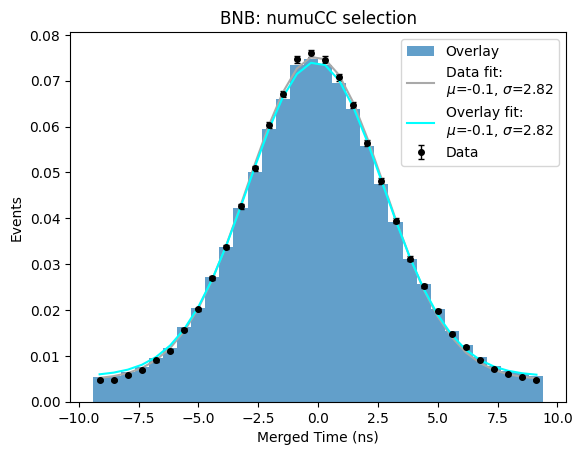

In [11]:
nbins = 32

emulate_ext = True

df_bnb_first = df_bnb_all

data = df_bnb_first.query("merge_time>-9.42 and merge_time<9.42 and numu_score>0.9")["merge_time"].to_numpy()
y,xbins = np.histogram(data,bins=nbins,range=(-9.42, 9.42))

#only using overlay for now, eventually we can move towards a full data to MC comparison that includes EXT and Dirt
overlay = df_bnb_first.query("merge_time>-9.42 and merge_time<9.42 and numu_score>0.9")["merge_time"].to_numpy()
weights = np.ones_like(df_bnb_first.query("merge_time>-9.42 and merge_time<9.42 and numu_score>0.9")["merge_time"].to_numpy())
if(emulate_ext):
    ext = np.random.uniform(-9.42, 9.42, size=int(len(overlay)*0.03))
    overlay = np.concatenate((overlay,ext))
weight = np.ones_like(overlay)*len(data)/len(overlay)
y_overlay,xbins = np.histogram(overlay,bins=nbins,range=(-9.42, 9.42),weights=weight)

x = get_bin_centers(xbins)

popt_overlay,pcov = curve_fit(gaus,x,y_overlay/np.sum(y))
print("overlay: Gaussian      mean:",round(popt_overlay[1],4),"  std:",round(popt_overlay[2],4),"  C:",round(popt_overlay[3],4))

popt,pcov = curve_fit(gaus,x,y/np.sum(y))
print("data: Gaussian      mean:",round(popt[1],4),"  std:",round(popt[2],4),"  C:",round(popt[3],4))


plt.figure()
plt.title("BNB: numuCC selection")
plt.errorbar(get_bin_centers(xbins),y/np.sum(y),yerr=np.sqrt(y)/np.sum(y),ms=8, lw=1,fmt='.',ecolor = 'black',color='black', capsize=2, capthick=1, label="Data")
plt.hist(overlay,bins=nbins,alpha=0.7,range=(-9.42, 9.42),label='Overlay',weights=weight/np.sum(y))
plt.plot(x,gaus(x,*popt),color='darkgray',label='Data fit:'+'\n'+f"$\mu$={round(popt[1],2)}, $\sigma$={round(abs(popt[2]),2)}")
plt.plot(x,gaus(x,*popt_overlay),color='cyan',label='Overlay fit:'+'\n'+f"$\mu$={round(popt_overlay[1],2)}, $\sigma$={round(abs(popt_overlay[2]),2)}")
plt.ylabel("Events")
plt.xlabel("Merged Time (ns)")
plt.legend()
plt.show()

In [12]:
kine_pio_energy_1 = []
kine_pio_energy_2 = []

for idx in range(len(df_bnb_all["kine_pio_energy_1"])):
    if df_bnb_all["kine_pio_energy_1"].iloc[idx] >= df_bnb_all["kine_pio_energy_2"].iloc[idx]:
        kine_pio_energy_1.append(df_bnb_all["kine_pio_energy_1"].iloc[idx])
        kine_pio_energy_2.append(df_bnb_all["kine_pio_energy_2"].iloc[idx])

    else:
        kine_pio_energy_2.append(df_bnb_all["kine_pio_energy_1"].iloc[idx])
        kine_pio_energy_1.append(df_bnb_all["kine_pio_energy_2"].iloc[idx])
        
df_bnb_all["kine_pio_energy_1"] = kine_pio_energy_1
df_bnb_all["kine_pio_energy_2"] = kine_pio_energy_2

kine_pio_energy_1 = []
kine_pio_energy_2 = []

for idx in range(len(df_bnb_all["kine_pio_energy_1"])):
    if df_bnb_all["kine_pio_energy_1"].iloc[idx] >= df_bnb_all["kine_pio_energy_2"].iloc[idx]:
        kine_pio_energy_1.append(df_bnb_all["kine_pio_energy_1"].iloc[idx])
        kine_pio_energy_2.append(df_bnb_all["kine_pio_energy_2"].iloc[idx])

    else:
        kine_pio_energy_2.append(df_bnb_all["kine_pio_energy_1"].iloc[idx])
        kine_pio_energy_1.append(df_bnb_all["kine_pio_energy_2"].iloc[idx])
        
df_bnb_all["kine_pio_energy_1"] = kine_pio_energy_1
df_bnb_all["kine_pio_energy_2"] = kine_pio_energy_2


def pi0_processing(all_df):
    RAD = 2*np.pi/360
    kine_pio_energy_1 = all_df["kine_pio_energy_1"].to_numpy()
    kine_pio_energy_2 = all_df["kine_pio_energy_2"].to_numpy()
    kine_pio_theta_1 = all_df["kine_pio_theta_1"].to_numpy()
    kine_pio_theta_2 = all_df["kine_pio_theta_2"].to_numpy()
    kine_pio_phi_1 = all_df["kine_pio_phi_1"].to_numpy()
    kine_pio_phi_2 = all_df["kine_pio_phi_2"].to_numpy()
    kine_pio_angle = all_df["kine_pio_angle"].to_numpy()

    pi0_momentum_lst = []
    pi0_momentum_0_lst = []
    pi0_momentum_1_lst = []
    pi0_momentum_2_lst = []
    pi0_phi_lst = []
    pi0_cosphi_lst = []
    pi0_theta_lst = []
    pi0_costheta_lst = []
    pi0_costheta_CM_lst = []
    gamma_1_mom_0_lst = []
    gamma_2_mom_0_lst = []
    gamma_lead_mom_0_lst = []
    gamma_trail_mom_0_lst = []

    for i in tqdm(range(len(kine_pio_energy_1))):
        
        pi0_momentum = -1000
        pi0_mom_0 = -1000
        pi0_mom_1 = -1000
        pi0_mom_2 = -1000
        pi0_costheta = -1000
        pi0_costheta_CM = -1000
        pi0_phi = -1000
        pi0_cosphi = -1000
        pi0_theta = -1000
        pi0_costheta = -1000

        if(kine_pio_energy_1[i] > 0 and kine_pio_energy_2[i] > 0):
            pi0_mass = 135;
            alpha = abs((kine_pio_energy_1[i] - kine_pio_energy_2[i])/(kine_pio_energy_1[i] + kine_pio_energy_2[i]));
            pi0_total_energy = pi0_mass * np.sqrt(2./(1-alpha*alpha)/(1-np.cos(kine_pio_angle[i]*RAD)));
            pi0_momentum = np.sqrt(pi0_total_energy*pi0_total_energy - pi0_mass*pi0_mass);
            pi0_costheta_CM = pi0_total_energy/pi0_momentum * alpha
            
            gamma_1_mom_0 = kine_pio_energy_1[i]*np.cos(kine_pio_phi_1[i]*RAD)*np.sin(kine_pio_theta_1[i]*RAD) 
            gamma_1_mom_1 = kine_pio_energy_1[i]*np.sin(kine_pio_phi_1[i]*RAD)*np.sin(kine_pio_theta_1[i]*RAD) 
            gamma_1_mom_2 = kine_pio_energy_1[i]*np.cos(kine_pio_theta_1[i]*RAD)
            
            gamma_2_mom_0 = kine_pio_energy_2[i]*np.cos(kine_pio_phi_2[i]*RAD)*np.sin(kine_pio_theta_2[i]*RAD) 
            gamma_2_mom_1 = kine_pio_energy_2[i]*np.sin(kine_pio_phi_2[i]*RAD)*np.sin(kine_pio_theta_2[i]*RAD) 
            gamma_2_mom_2 = kine_pio_energy_2[i]*np.cos(kine_pio_theta_2[i]*RAD)

            pi0_mom_0 = gamma_1_mom_0 + gamma_2_mom_0
            pi0_mom_1 = gamma_1_mom_1 + gamma_2_mom_1
            pi0_mom_2 = gamma_1_mom_2 + gamma_2_mom_2
            
            pi0_theta, pi0_phi = get_angle(pi0_mom_0, pi0_mom_1, pi0_mom_2)
            
            #with pio energy
            gamma_1_mom_0_lst.append(gamma_1_mom_0)
            gamma_2_mom_0_lst.append(gamma_2_mom_0)
            
            if abs(gamma_1_mom_0) > abs(gamma_2_mom_0):
                gamma_lead_mom_0 = gamma_1_mom_0
                gamma_trail_mom_0 = gamma_2_mom_0
            else:
                gamma_lead_mom_0 = gamma_2_mom_0
                gamma_trail_mom_0 = gamma_1_mom_0
            
            #with bigger x-momentum
            gamma_lead_mom_0_lst.append(gamma_lead_mom_0)
            gamma_trail_mom_0_lst.append(gamma_trail_mom_0)
        else:
            gamma_1_mom_0_lst.append(-1000)
            gamma_2_mom_0_lst.append(-1000)
            gamma_lead_mom_0_lst.append(-1000)
            gamma_trail_mom_0_lst.append(-1000)
        
        pi0_momentum_lst.append(pi0_momentum)
        pi0_momentum_0_lst.append(pi0_mom_0)
        pi0_momentum_1_lst.append(pi0_mom_1)
        pi0_momentum_2_lst.append(pi0_mom_2)
        pi0_phi_lst.append(pi0_phi)
        if pi0_phi != -1000: pi0_cosphi_lst.append(np.cos(pi0_phi))
        else: pi0_cosphi_lst.append(-1000)
        pi0_theta_lst.append(pi0_theta)
        if pi0_theta != -1000: pi0_costheta_lst.append(np.cos(pi0_theta))
        else: pi0_costheta_lst.append(-1000)
        pi0_costheta_CM_lst.append(pi0_costheta_CM)

    all_df["reco_pi0_mom"] = pi0_momentum_lst
    all_df["reco_pi0_mom_0"] = pi0_momentum_0_lst
    all_df["reco_pi0_mom_1"] = pi0_momentum_1_lst
    all_df["reco_pi0_mom_2"] = pi0_momentum_2_lst
    all_df["reco_pi0_phi"] = pi0_phi_lst
    all_df["reco_pi0_cosphi"] = pi0_cosphi_lst
    all_df["reco_pi0_theta"] = pi0_theta_lst
    all_df["reco_pi0_costheta"] = pi0_costheta_lst
    all_df["reco_pi0_costheta_CM"] = pi0_costheta_CM_lst   
    all_df["gamma_1_mom_0"] = gamma_1_mom_0_lst
    all_df["gamma_2_mom_0"] = gamma_2_mom_0_lst
    all_df["gamma_lead_mom_0"] = gamma_lead_mom_0_lst
    all_df["gamma_trail_mom_0"] = gamma_trail_mom_0_lst
    
pi0_processing(df_bnb_all)

 38%|███▊      | 87728/228484 [00:00<00:00, 149144.24it/s]C:\Users\andre\AppData\Local\Temp\ipykernel_12472\996684533.py:72: RuntimeWarning: divide by zero encountered in scalar divide
  pi0_total_energy = pi0_mass * np.sqrt(2./(1-alpha*alpha)/(1-np.cos(kine_pio_angle[i]*RAD)));
C:\Users\andre\AppData\Local\Temp\ipykernel_12472\996684533.py:74: RuntimeWarning: invalid value encountered in scalar divide
  pi0_costheta_CM = pi0_total_energy/pi0_momentum * alpha
100%|██████████| 228484/228484 [00:01<00:00, 150194.29it/s]


In [13]:
global_query = "merge_time>-9.42 and merge_time<9.42 and numu_score>0.9"

def get_stats(df, query, x_var, merge_time_col, bins, nbins):
    xvar_full_list =  df.query(query)[x_var].to_numpy()
    weight_list =  np.ones_like(df.query(query)[x_var].to_numpy())
    merge_time =  df.query(query)[merge_time_col].to_numpy()

    data = []
    data_weights = []
    means_CCpi0 = []
    mean_errors_CCpi0 = []
    stds_CCpi0 = []
    std_errors_CCpi0 = []

    for i in range(len(bins)-1):
        data.append([])
        data_weights.append([])   

    for event in tqdm(range(len(xvar_full_list))):
        for i in range(len(bins)-1):
            lo = bins[i]
            hi = 0
            if i==len(bins)-2: hi=1000000
            else: hi = bins[i+1]
            if(xvar_full_list[event]>=lo and xvar_full_list[event]<hi):
                data[i].append(merge_time[event])
                data_weights[i].append(weight_list[event])

        
    for i in range(len(bins)-1):

        y,xbins = np.histogram(data[i],bins=nbins,range=(-9.42, 9.42),weights=data_weights[i])
        
        x = get_bin_centers(xbins)
        means_CCpi0.append(np.sum(x*y)/np.sum(y))
        mean_errors_CCpi0.append(np.sqrt(np.sum(y)/np.sum(y)**2))
        stds_CCpi0.append(np.sqrt(np.sum(y*(x-means_CCpi0[-1])**2)/np.sum(y)))
        std_errors_CCpi0.append(np.sqrt(np.sum(y*(x-means_CCpi0[-1])**2)/np.sum(y)**2))
    return means_CCpi0, mean_errors_CCpi0, stds_CCpi0, std_errors_CCpi0
    
#Definitions for some slections and signals that are usefull to examine

em_charge_scale = 0.95

#numucc signal
sig_query = "truth_isCC==1 and truth_nuPdg==14"
#numucc selection
sel_query = "numu_cc_flag>=0 and numu_score > 0.9"
# "NC" selection. mostly just the base for the cut based NCpi0 selection
NC_query = "cosmict_flag==0 and numu_score < 0"
#CC pi0 cut based selection
CCpi0_query = sel_query + ' and ((kine_pio_vtx_dis < 9 ) and kine_pio_energy_1* @em_charge_scale > 40 and kine_pio_energy_2* @em_charge_scale > 25 and kine_pio_dis_1 < 110 and kine_pio_dis_2 < 120 and kine_pio_angle > 0 and kine_pio_angle < 174  and pio_mass > 22 and pio_mass < 300)'
#NC pi0 cut based selection
NCpi0_query = NC_query + ' and ((kine_pio_flag==1 and kine_pio_vtx_dis < 9 or kine_pio_flag==2) and kine_pio_energy_1* em_charge_scale > 40 and kine_pio_energy_2* em_charge_scale > 25 and kine_pio_dis_1 < 110 and kine_pio_dis_2 < 120 and kine_pio_angle > 0 and kine_pio_angle < 174  and pio_mass > 22 and pio_mass < 300)'
#CC+NC pi0 cut based selection
pi0_query = '((kine_pio_flag==1 and kine_pio_vtx_dis < 9 or kine_pio_flag==2) and kine_pio_energy_1* em_charge_scale > 40 and kine_pio_energy_2* em_charge_scale > 25 and kine_pio_dis_1 < 110 and kine_pio_dis_2 < 120 and kine_pio_angle > 0 and kine_pio_angle < 174  and pio_mass > 22 and pio_mass < 300)'
#NC pi0 BDT based selection
NCpi0_bdt_query = 'nc_pio_score > 1.816 and kine_pio_energy_1 > 0 and kine_pio_energy_2 > 0'

In [14]:
def scaling_recalc(data_run4b_super_df):
    
    em_charge_scale = 0.95
    data_run4b_super_df["pio_mass"] = data_run4b_super_df['kine_pio_mass'].to_numpy()* em_charge_scale
    data_run4b_super_df["em_charge_scale"] = np.ones_like(data_run4b_super_df['kine_pio_mass'].to_numpy())* em_charge_scale
    
    #Get the reconstructed neutrino energy, for data we need to apply a scaling to the shower energy
    corrected_kine_reco_Enus = []
    energy_info_lists = data_run4b_super_df["kine_energy_info"].to_numpy()
    energy_lists = data_run4b_super_df["kine_energy_particle"].to_numpy()
    pdg_lists = data_run4b_super_df["kine_particle_type"].to_numpy()
    add_energies = data_run4b_super_df["kine_reco_add_energy"].to_numpy()
    for i in tqdm(range(data_run4b_super_df.shape[0])):
        corrected_kine_reco_Enu = 0.
        energy_list = energy_lists[i]
        pdg_list = pdg_lists[i]
        energy_info_list = energy_info_lists[i]
        for j in range(len(energy_list)):
            if energy_info_list[j] == 2 and pdg_list[j] == 11:
                corrected_kine_reco_Enu += em_charge_scale * energy_list[j]
            else:
                corrected_kine_reco_Enu += energy_list[j]
        corrected_kine_reco_Enu += add_energies[i]
        
        corrected_kine_reco_Enus.append(corrected_kine_reco_Enu) 

    data_run4b_super_df["kine_reco_Enu"] = corrected_kine_reco_Enus

    

    #get the muon and leading proton info out of the pfeval tree
    mu = data_run4b_super_df["reco_muonMomentum"].to_numpy()
    
    '''mu0 = data_run4b_super_df["reco_muonMomentum[0]"].to_numpy()
    mu1 = data_run4b_super_df["reco_muonMomentum[1]"].to_numpy()
    mu2 = data_run4b_super_df["reco_muonMomentum[2]"].to_numpy()
    mu3 = data_run4b_super_df["reco_muonMomentum[3]"].to_numpy()

    p0 = data_run4b_super_df["reco_protonMomentum[0]"].to_numpy()
    p1 = data_run4b_super_df["reco_protonMomentum[1]"].to_numpy()
    p2 = data_run4b_super_df["reco_protonMomentum[2]"].to_numpy()
    p3 = data_run4b_super_df["reco_protonMomentum[3]"].to_numpy()'''

    
    p = data_run4b_super_df["reco_protonMomentum"].to_numpy()

    kine_reco_Enu = data_run4b_super_df["kine_reco_Enu"].to_numpy()

    mu_thetas = []
    mu_phis = []
    mu_costhetas = []
    mu_cosphis = []
    reco_Emuon = []

    p_thetas = []
    p_phis = []
    p_costhetas = []
    p_cosphis = []
    reco_Eproton = []

    Ehadron = []

    print(len(mu))

    for i in range(len(mu)):
        if(mu[i][3]<=0): 
            mu_theta = np.nan
            mu_phi = np.nan
            Ehadron.append(kine_reco_Enu[i])
        else: 
            mu_theta, mu_phi = get_angle(mu[i][0], mu[i][1], mu[i][2])
            Ehadron.append(kine_reco_Enu[i]-mu[i][3]*1000)
        mu_thetas.append(mu_theta)
        mu_phis.append(mu_phi)
        mu_costhetas.append(np.cos(mu_theta))
        mu_cosphis.append(np.cos(mu_phi))
        reco_Emuon.append(mu[i][3]*1000)
        
        if(p[i][3]<=0): 
            p_theta = np.nan
            p_phi = np.nan
            reco_Eproton.append(0)
            
        else: 
            p_theta, p_phi = get_angle(p[i][0], p[i][1], p[i][2])
            reco_Eproton.append(p[i][3]*1000-938.27)
        p_thetas.append(p_theta)
        p_phis.append(p_phi)
        p_costhetas.append(np.cos(p_theta))
        p_cosphis.append(np.cos(p_phi))
        
        
        
        
    print(len(data_run4b_super_df))
    print(len(mu_thetas), len(mu_phis), len(mu_costhetas), len(reco_Emuon))

    data_run4b_super_df["reco_muon_theta"] = mu_thetas
    data_run4b_super_df["reco_muon_phi"] = mu_phis
    data_run4b_super_df["reco_muon_costheta"] = mu_costhetas
    data_run4b_super_df["reco_muon_cosphi"] = mu_cosphis 
    data_run4b_super_df["reco_Emuon"] = reco_Emuon

    data_run4b_super_df["reco_proton_theta"] = p_thetas
    data_run4b_super_df["reco_proton_phi"] = p_phis
    data_run4b_super_df["reco_proton_costheta"] = p_costhetas
    data_run4b_super_df["reco_proton_cosphi"] = p_cosphis 
    data_run4b_super_df["reco_Eproton"] = reco_Eproton

    data_run4b_super_df["Ehadron"] = Ehadron

scaling_recalc(df_bnb_all)

100%|██████████| 228484/228484 [00:00<00:00, 596691.53it/s]


228484
228484
228484 228484 228484 228484


In [85]:
def plot_merge_time_spread( x_var, bins, nbins=18, selection_query=CCpi0_query):
    selections = [CCpi0_query, NCpi0_bdt_query, "numu_score > 0.9", "nue_score > 4"]
    for selection in selections:
        selection_query = selection
        means_data, mean_errors_data, stds_data, std_errors_data = get_stats(
            df_bnb_all, selection_query, x_var, "merge_time", bins, nbins
        )
        label_select = "CCpi0"
        marker_select = "o"
        color_data = "blue"
        color_mc = "cyan"
        if selection_query == NCpi0_bdt_query:
            label_select = "NCpi0"
            marker_select = "s"
            color_data = "red"
            color_mc = "orange"
        if selection_query == "numu_score > 0.9":
            label_select = "NumuCC"
            marker_select = "D"
            color_data = "green"
            color_mc = "lime"
        if selection_query == "nue_score > 4":
            label_select = "NueCC"
            marker_select = "v"
            color_data = "purple"
            color_mc = "violet"
        bin_centers = get_bin_centers(bins)
        plt.title("BNB Data vs MC: " + x_var)
        plt.errorbar(bin_centers, means_data, yerr=mean_errors_data, lw=0, ms=5, marker = marker_select, elinewidth=1, label="Data " + label_select, color = color_data)
        plt.xlabel(x_var)
        plt.ylabel("Mean Merged Time (ns)")
        plt.axhline(0, color='gray', linestyle=':', linewidth=1, alpha=0.5) 
        plt.legend(loc='upper left')


    '''#plt.figure(dpi=150)
    plt.title("BNB Data vs MC: " + x_var)
    plt.errorbar(bin_centers, stds_data, yerr=std_errors_data, lw=0, ms=5, marker="o", elinewidth=1, label="Data")
    plt.errorbar(bin_centers, stds_mc, yerr=std_errors_mc, lw=0, ms=5, marker="s", elinewidth=1, label="MC")
    plt.xlabel(x_var)
    plt.ylabel("Spread (ns)")
    plt.legend()
    #plt.show()'''
    
    
'''plot_merge_time_spread("reco_nuvtxX", np.linspace(0, 250, 4), 15)
plt.show()

plot_merge_time_spread("reco_nuvtxY", np.linspace(-120,120, 6), 10)
plt.show()

plot_merge_time_spread("reco_nuvtxZ", np.linspace(0, 1100, 6), 20)
plt.show()

plot_merge_time_spread("kine_reco_Enu", np.linspace(0, 2000, 6), 40)
plt.show()

plot_merge_time_spread("Ehadron", np.linspace(0,2500, 6), 40)
plt.show()

plot_merge_time_spread("reco_proton_costheta", np.linspace(-1,1,6), 90)
plt.show()

plot_merge_time_spread("reco_proton_phi", np.linspace(-np.pi, np.pi, 6), 30)
plt.show()

#[0, 250, 400, 550, 700, 900, 2000], low stats(most in -1000)
plot_merge_time_spread("reco_Emuon", np.linspace(0, 2000, 6), 20)
plt.show()

#muon doesn't apply to pi0
plot_merge_time_spread("reco_muon_costheta", np.linspace(-1, 1, 6), 60)
plt.show()

plot_merge_time_spread("reco_muon_phi", np.linspace(-np.pi, np.pi, 6), 30)
plt.show()

plot_merge_time_spread("pio_mass", np.linspace(0, 300, 6), 40)
plt.show()

#plot_merge_time_spread("kine_pio_vtx_dis", np.linspace(0, 30, 6), 80) high grouping

plot_merge_time_spread("kine_pio_energy_1", np.linspace(0, 600, 6), 100)
plt.show()

plot_merge_time_spread("kine_pio_energy_2", np.linspace(0, 600, 6), 100)
plt.show()

plot_merge_time_spread("kine_pio_theta_1", np.linspace(0, 180, 6), 80)
plt.show()

plot_merge_time_spread("kine_pio_theta_2", np.linspace(0, 180, 6), 70)
plt.show()

plot_merge_time_spread("kine_pio_phi_1", np.linspace(-2*np.pi, 2*np.pi, 6), 80)
plt.show()

plot_merge_time_spread("kine_pio_dis_1", np.linspace(0, 100, 6), 30)
plt.show()

plot_merge_time_spread("kine_pio_dis_2", np.linspace(0, 100, 6), 30)
plt.show()

plot_merge_time_spread("kine_pio_angle", np.linspace(0, 180, 6), 80)
plt.show()'''



'plot_merge_time_spread("reco_nuvtxX", np.linspace(0, 250, 4), 15)\nplt.show()\n\nplot_merge_time_spread("reco_nuvtxY", np.linspace(-120,120, 6), 10)\nplt.show()\n\nplot_merge_time_spread("reco_nuvtxZ", np.linspace(0, 1100, 6), 20)\nplt.show()\n\nplot_merge_time_spread("kine_reco_Enu", np.linspace(0, 2000, 6), 40)\nplt.show()\n\nplot_merge_time_spread("Ehadron", np.linspace(0,2500, 6), 40)\nplt.show()\n\nplot_merge_time_spread("reco_proton_costheta", np.linspace(-1,1,6), 90)\nplt.show()\n\nplot_merge_time_spread("reco_proton_phi", np.linspace(-np.pi, np.pi, 6), 30)\nplt.show()\n\n#[0, 250, 400, 550, 700, 900, 2000], low stats(most in -1000)\nplot_merge_time_spread("reco_Emuon", np.linspace(0, 2000, 6), 20)\nplt.show()\n\n#muon doesn\'t apply to pi0\nplot_merge_time_spread("reco_muon_costheta", np.linspace(-1, 1, 6), 60)\nplt.show()\n\nplot_merge_time_spread("reco_muon_phi", np.linspace(-np.pi, np.pi, 6), 30)\nplt.show()\n\nplot_merge_time_spread("pio_mass", np.linspace(0, 300, 6), 40)\

100%|██████████| 8732/8732 [00:00<00:00, 483921.92it/s]


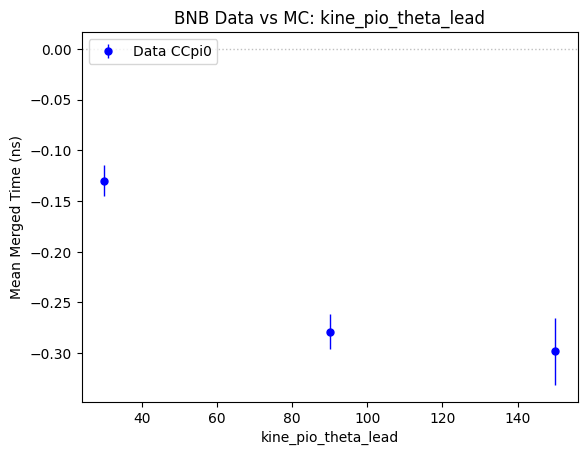

100%|██████████| 8732/8732 [00:00<00:00, 436590.01it/s]


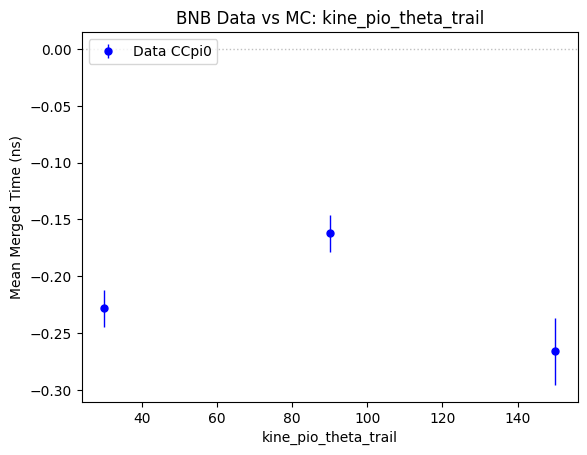

100%|██████████| 8732/8732 [00:00<00:00, 543957.56it/s]


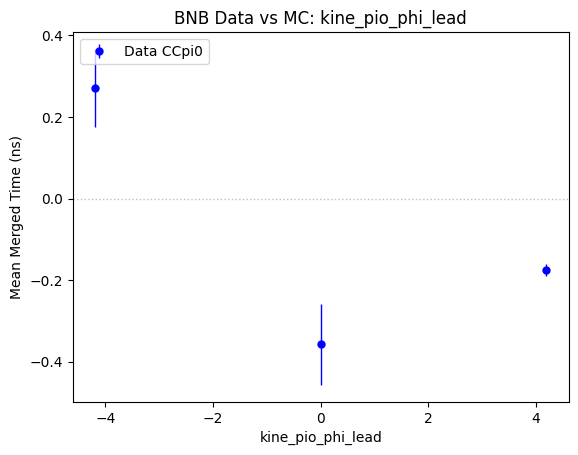

100%|██████████| 8732/8732 [00:00<00:00, 409209.53it/s]


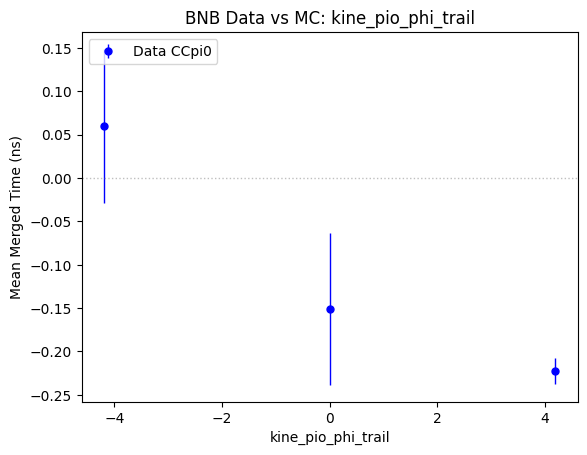

100%|██████████| 8732/8732 [00:00<00:00, 380979.09it/s]


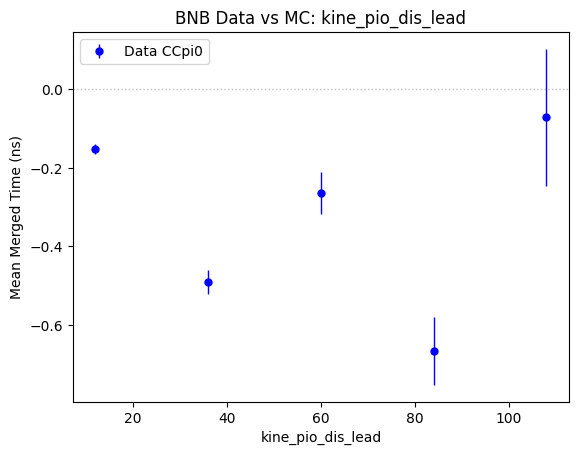

100%|██████████| 8732/8732 [00:00<00:00, 419243.15it/s]


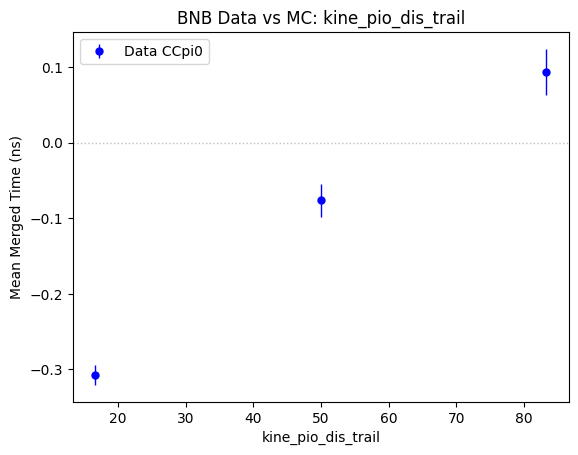

In [16]:
kine_pio_theta_lead = []
kine_pio_theta_trail = []
kine_pio_phi_lead = []
kine_pio_phi_trail = []
kine_pio_dis_lead = []
kine_pio_dis_trail = []

for idx in range(len(df_bnb_all["kine_pio_energy_1"])):
    if df_bnb_all["kine_pio_energy_1"].iloc[idx] >= df_bnb_all["kine_pio_energy_2"].iloc[idx]:
        kine_pio_theta_lead.append(df_bnb_all["kine_pio_theta_1"].iloc[idx])
        kine_pio_theta_trail.append(df_bnb_all["kine_pio_theta_2"].iloc[idx])
        kine_pio_phi_lead.append(df_bnb_all["kine_pio_phi_1"].iloc[idx])
        kine_pio_phi_trail.append(df_bnb_all["kine_pio_phi_2"].iloc[idx])
        kine_pio_dis_lead.append(df_bnb_all["kine_pio_dis_1"].iloc[idx])
        kine_pio_dis_trail.append(df_bnb_all["kine_pio_dis_2"].iloc[idx])
    else:
        kine_pio_theta_lead.append(df_bnb_all["kine_pio_theta_2"].iloc[idx])
        kine_pio_theta_trail.append(df_bnb_all["kine_pio_theta_1"].iloc[idx])
        kine_pio_phi_lead.append(df_bnb_all["kine_pio_phi_2"].iloc[idx])
        kine_pio_phi_trail.append(df_bnb_all["kine_pio_phi_1"].iloc[idx])
        kine_pio_dis_lead.append(df_bnb_all["kine_pio_dis_2"].iloc[idx])
        kine_pio_dis_trail.append(df_bnb_all["kine_pio_dis_1"].iloc[idx])

df_bnb_all["kine_pio_theta_lead"] = kine_pio_theta_lead
df_bnb_all["kine_pio_theta_trail"] = kine_pio_theta_trail
df_bnb_all["kine_pio_phi_lead"] = kine_pio_phi_lead
df_bnb_all["kine_pio_phi_trail"] = kine_pio_phi_trail
df_bnb_all["kine_pio_dis_lead"] = kine_pio_dis_lead
df_bnb_all["kine_pio_dis_trail"] = kine_pio_dis_trail

kine_pio_theta_lead = []
kine_pio_theta_trail = []
kine_pio_phi_lead = []
kine_pio_phi_trail = []
kine_pio_dis_lead = []
kine_pio_dis_trail = []

for idx in range(len(df_bnb_all["kine_pio_energy_1"])):
    if df_bnb_all["kine_pio_energy_1"].iloc[idx] >= df_bnb_all["kine_pio_energy_2"].iloc[idx]:
        kine_pio_theta_lead.append(df_bnb_all["kine_pio_theta_1"].iloc[idx])
        kine_pio_theta_trail.append(df_bnb_all["kine_pio_theta_2"].iloc[idx])
        kine_pio_phi_lead.append(df_bnb_all["kine_pio_phi_1"].iloc[idx])
        kine_pio_phi_trail.append(df_bnb_all["kine_pio_phi_2"].iloc[idx])
        kine_pio_dis_lead.append(df_bnb_all["kine_pio_dis_1"].iloc[idx])
        kine_pio_dis_trail.append(df_bnb_all["kine_pio_dis_2"].iloc[idx])
    else:
        kine_pio_theta_lead.append(df_bnb_all["kine_pio_theta_2"].iloc[idx])
        kine_pio_theta_trail.append(df_bnb_all["kine_pio_theta_1"].iloc[idx])
        kine_pio_phi_lead.append(df_bnb_all["kine_pio_phi_2"].iloc[idx])
        kine_pio_phi_trail.append(df_bnb_all["kine_pio_phi_1"].iloc[idx])
        kine_pio_dis_lead.append(df_bnb_all["kine_pio_dis_2"].iloc[idx])
        kine_pio_dis_trail.append(df_bnb_all["kine_pio_dis_1"].iloc[idx])

df_bnb_all["kine_pio_theta_lead"] = kine_pio_theta_lead
df_bnb_all["kine_pio_theta_trail"] = kine_pio_theta_trail
df_bnb_all["kine_pio_phi_lead"] = kine_pio_phi_lead
df_bnb_all["kine_pio_phi_trail"] = kine_pio_phi_trail
df_bnb_all["kine_pio_dis_lead"] = kine_pio_dis_lead
df_bnb_all["kine_pio_dis_trail"] = kine_pio_dis_trail

plot_merge_time_spread("kine_pio_theta_lead", np.linspace(0, 180, 4), 80)
plt.show()

plot_merge_time_spread("kine_pio_theta_trail", np.linspace(0, 180, 4), 70)
plt.show()

plot_merge_time_spread("kine_pio_phi_lead", np.linspace(-2*np.pi, 2*np.pi, 4), 80)
plt.show()

plot_merge_time_spread("kine_pio_phi_trail", np.linspace(-2*np.pi, 2*np.pi, 4), 10)
plt.show()



plot_merge_time_spread("kine_pio_dis_lead", np.linspace(0, 120, 6), 20)
plt.show()

plot_merge_time_spread("kine_pio_dis_trail", np.linspace(0, 100, 4), 20)
plt.show()



100%|██████████| 8732/8732 [00:00<00:00, 294356.05it/s]


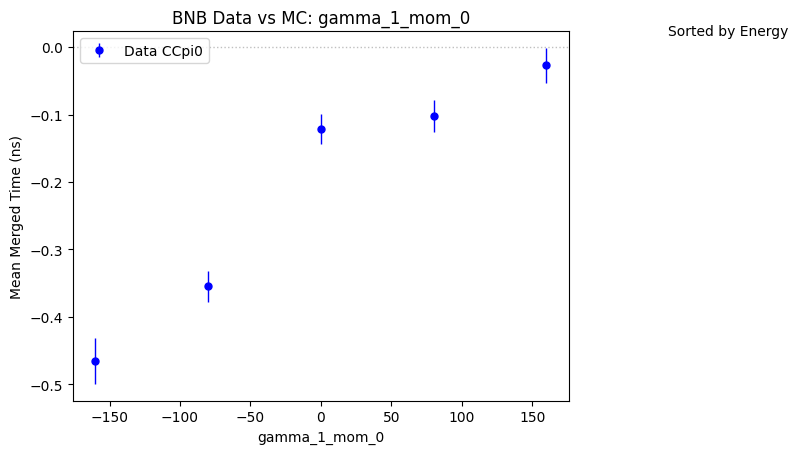

100%|██████████| 8732/8732 [00:00<00:00, 286708.07it/s]


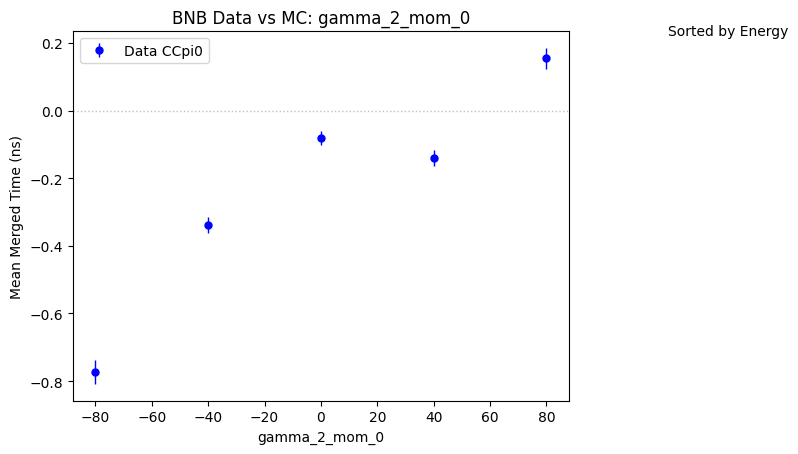

100%|██████████| 8732/8732 [00:00<00:00, 299948.92it/s]


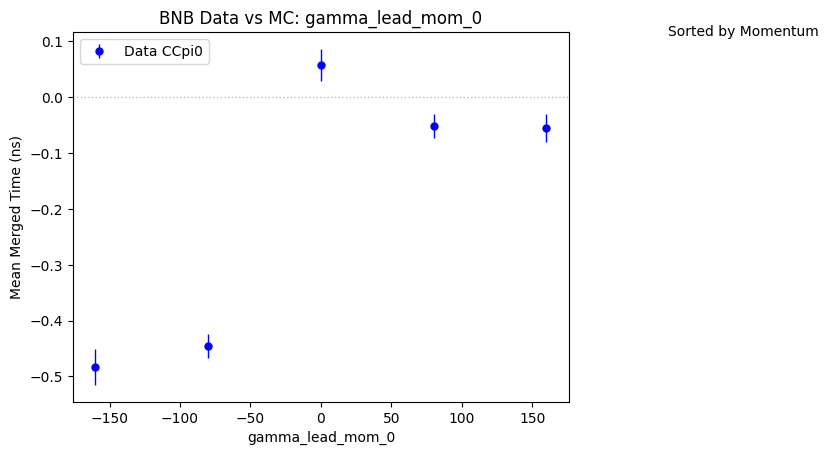

100%|██████████| 8732/8732 [00:00<00:00, 260329.12it/s]


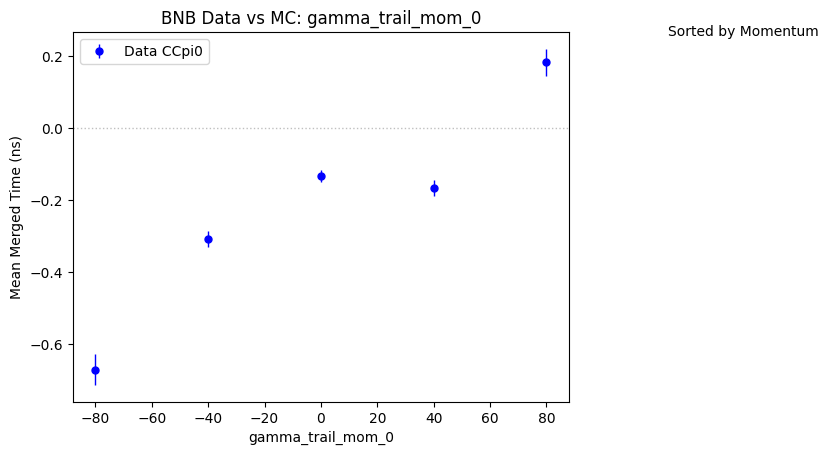

100%|██████████| 8732/8732 [00:00<00:00, 386817.58it/s]


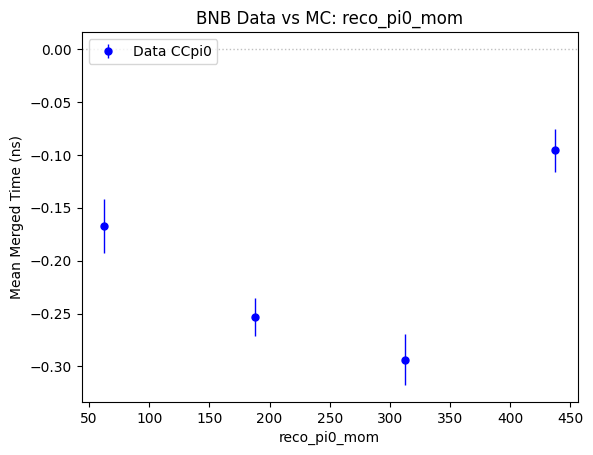

100%|██████████| 8732/8732 [00:00<00:00, 298874.37it/s]


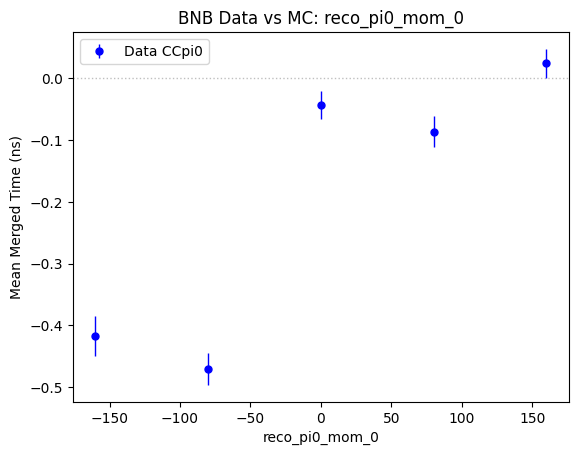

100%|██████████| 8732/8732 [00:00<00:00, 219292.29it/s]


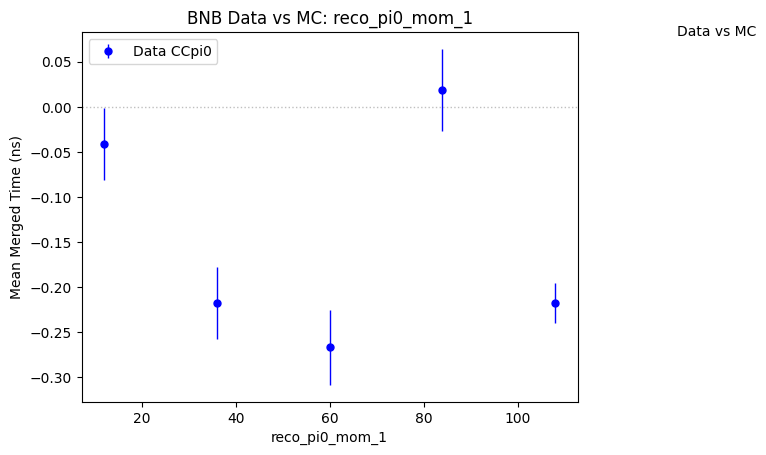

100%|██████████| 8732/8732 [00:00<00:00, 301016.38it/s]


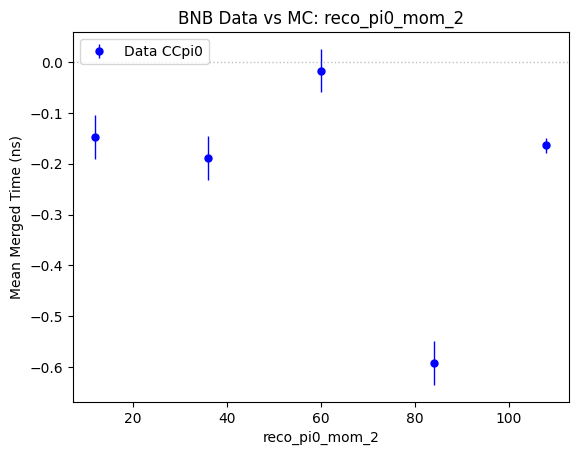

100%|██████████| 8732/8732 [00:00<00:00, 274142.85it/s]


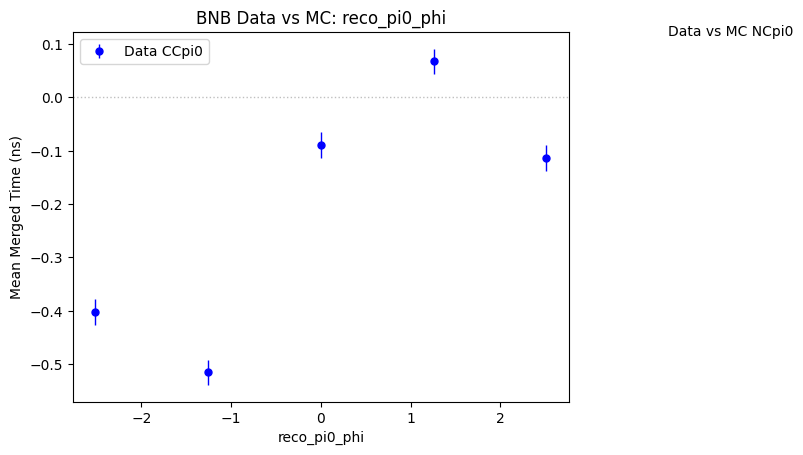

100%|██████████| 8732/8732 [00:00<00:00, 323188.25it/s]


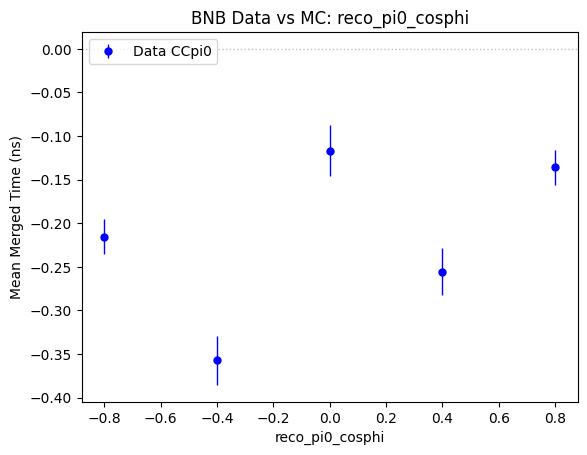

100%|██████████| 8732/8732 [00:00<00:00, 242669.57it/s]


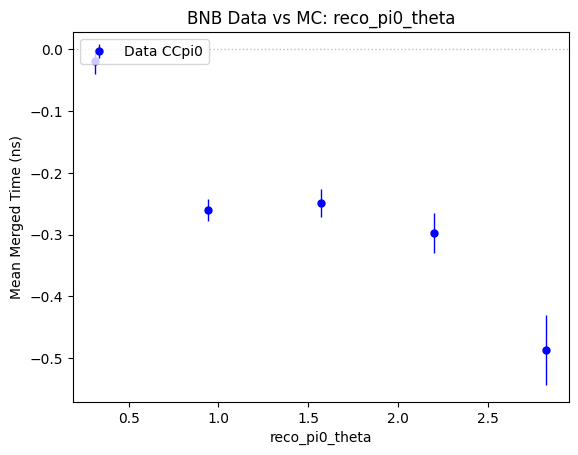

100%|██████████| 8732/8732 [00:00<00:00, 399409.60it/s]


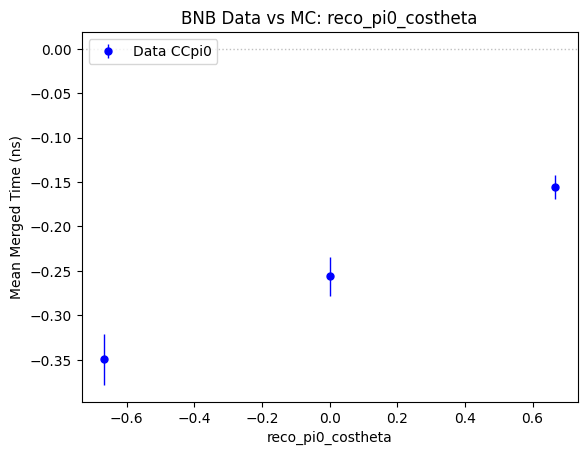

100%|██████████| 8732/8732 [00:00<00:00, 231748.86it/s]
C:\Users\andre\AppData\Local\Temp\ipykernel_12472\1872816581.py:35: RuntimeWarning: invalid value encountered in scalar divide
  means_CCpi0.append(np.sum(x*y)/np.sum(y))
C:\Users\andre\AppData\Local\Temp\ipykernel_12472\1872816581.py:36: RuntimeWarning: invalid value encountered in scalar divide
  mean_errors_CCpi0.append(np.sqrt(np.sum(y)/np.sum(y)**2))


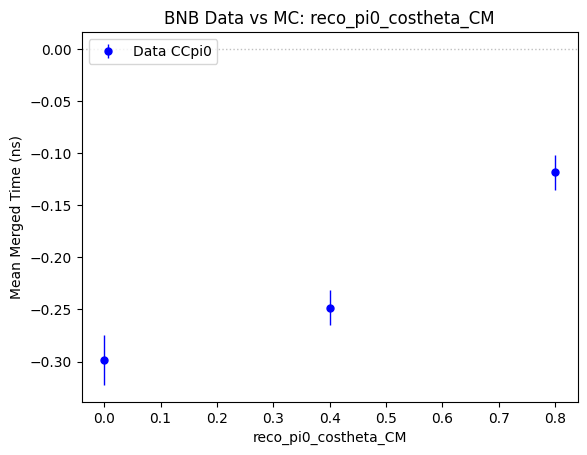

In [17]:
plot_merge_time_spread("gamma_1_mom_0", np.linspace(-200, 200, 6), 20)
plt.text(1.2, 1, "Sorted by Energy", transform=plt.gca().transAxes, va='center')
plt.show()

plot_merge_time_spread("gamma_2_mom_0", np.linspace(-100, 100, 6), 20)
plt.text(1.2, 1, "Sorted by Energy", transform=plt.gca().transAxes, va='center')
plt.show()

plot_merge_time_spread("gamma_lead_mom_0", np.linspace(-200, 200, 6), 20)
plt.text(1.2, 1, "Sorted by Momentum", transform=plt.gca().transAxes, va='center')
plt.show()

plot_merge_time_spread("gamma_trail_mom_0", np.linspace(-100, 100, 6), 20)
plt.text(1.2, 1, "Sorted by Momentum", transform=plt.gca().transAxes, va='center')
plt.show()

plot_merge_time_spread("reco_pi0_mom", np.linspace(0, 500, 5), 20)
plt.show()

plot_merge_time_spread("reco_pi0_mom_0", np.linspace(-200, 200, 6), 20)
plt.show()

plot_merge_time_spread("reco_pi0_mom_1", np.linspace(0, 120, 6), 15)
plt.text(1.2, 1, "Data vs MC", transform=plt.gca().transAxes, va='center')
plt.show()

plot_merge_time_spread("reco_pi0_mom_2", np.linspace(0, 120, 6), 10)
plt.show()

plot_merge_time_spread("reco_pi0_phi", np.linspace(-np.pi, np.pi, 6), 25)
plt.text(1.2, 1, "Data vs MC NCpi0", transform=plt.gca().transAxes, va='center')
plt.show()

plot_merge_time_spread("reco_pi0_cosphi", np.linspace(-1, 1, 6), 15)
plt.show()

plot_merge_time_spread("reco_pi0_theta", np.linspace(0, np.pi, 6), 20)
plt.show()

plot_merge_time_spread("reco_pi0_costheta", np.linspace(-1, 1, 4), 15)
plt.show()

plot_merge_time_spread("reco_pi0_costheta_CM", np.linspace(-1, 1, 6), 15)
plt.show()

In [18]:
print(df_bnb_all.query("nue_score > 2").shape[0])
print(df_bnb_all.query("nue_score > 7").shape[0])

1569
610


In [19]:
print(df_bnb_all.columns.to_list())

['index', 'run', 'subrun', 'event', 'neutrino_type', 'reco_nuvtxX', 'reco_nuvtxY', 'reco_nuvtxZ', 'reco_showervtxX', 'reco_showervtxY', 'reco_showervtxZ', 'reco_showerKE', 'reco_muonvtxX', 'reco_muonvtxY', 'reco_muonvtxZ', 'reco_muonMomentum', 'evtDeltaTimeNS', 'evtTimeNS', 'reco_protonMomentum', 'reco_showerMomentum', 'reco_Nproton', 'reco_Ntrack', 'reco_id', 'reco_pdg', 'reco_process', 'reco_mother', 'reco_startXYZT', 'reco_endXYZT', 'reco_startMomentum', 'reco_endMomentum', 'reco_daughters', 'cosmic_flag', 'cosmic_n_solid_tracks', 'cosmic_energy_main_showers', 'cosmic_energy_direct_showers', 'cosmic_energy_indirect_showers', 'cosmic_n_direct_showers', 'cosmic_n_indirect_showers', 'cosmic_n_main_showers', 'cosmic_filled', 'gap_flag', 'gap_flag_prolong_u', 'gap_flag_prolong_v', 'gap_flag_prolong_w', 'gap_flag_parallel', 'gap_n_points', 'gap_n_bad', 'gap_energy', 'gap_num_valid_tracks', 'gap_flag_single_shower', 'gap_filled', 'mip_quality_flag', 'mip_quality_energy', 'mip_quality_overl

In [20]:
'''nue_score

query will be nue_score>4
'reco_nuvtxX', 'reco_nuvtxY', 'reco_nuvtxZ' reco_showerKE' reco_showerMomentum -> all 4 components
mirror the codef for the muon, and get the shower angles reco_showerMomentum
kine_reco_enu
flash_measPe'''

"nue_score\n\nquery will be nue_score>4\n'reco_nuvtxX', 'reco_nuvtxY', 'reco_nuvtxZ' reco_showerKE' reco_showerMomentum -> all 4 components\nmirror the codef for the muon, and get the shower angles reco_showerMomentum\nkine_reco_enu\nflash_measPe"

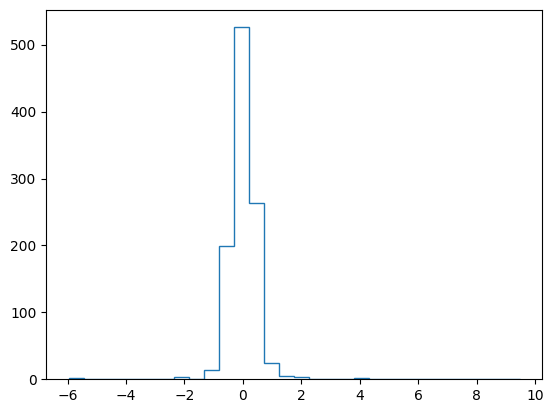

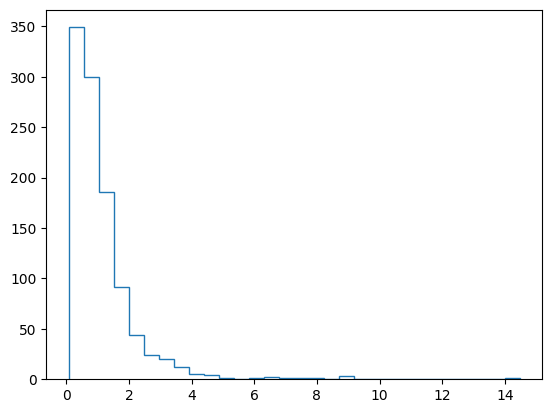

100%|██████████| 1046/1046 [00:00<00:00, 298431.53it/s]


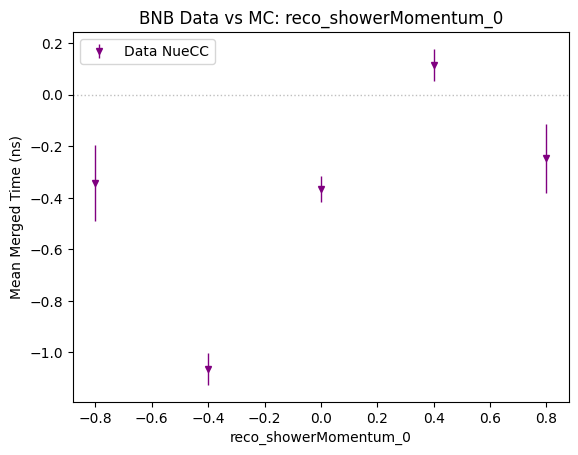

100%|██████████| 1046/1046 [00:00<00:00, 260912.40it/s]


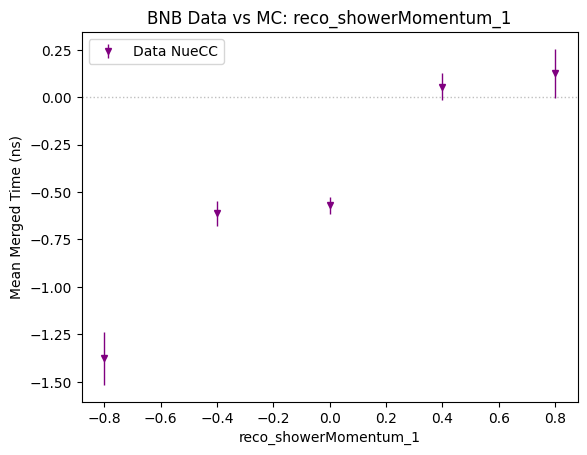

100%|██████████| 1046/1046 [00:00<00:00, 347449.27it/s]


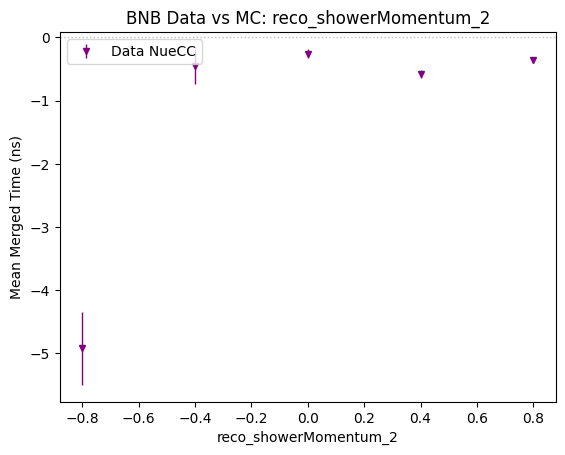

100%|██████████| 1046/1046 [00:00<00:00, 260912.40it/s]


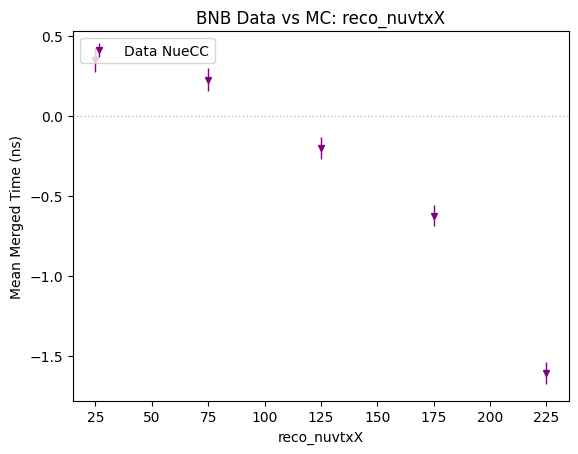

100%|██████████| 1046/1046 [00:00<00:00, 299531.78it/s]


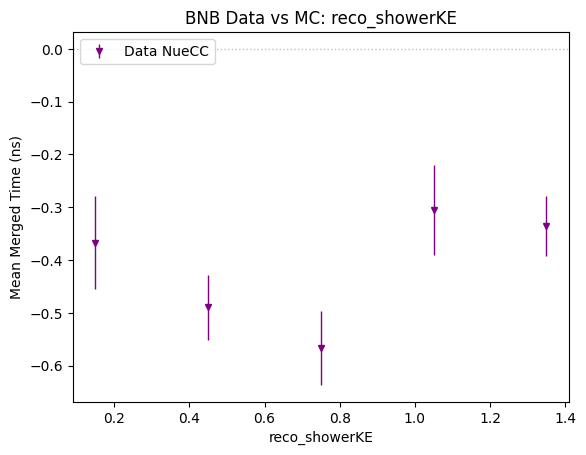

In [21]:
df_bnb_all[["reco_showerMomentum_0", "reco_showerMomentum_1", "reco_showerMomentum_2", "reco_showerMomentum_3"]] = pd.DataFrame(
    df_bnb_all["reco_showerMomentum"].tolist(), index=df_bnb_all.index)

plt.hist(df_bnb_all.query("nue_score > 4")["reco_showerMomentum_0"], bins=30, histtype='step', label="Reco Shower Momentum 0")
plt.show()
plt.hist(df_bnb_all.query("nue_score > 4")["reco_showerKE"], bins=30, histtype='step', label="Reco Shower Momentum 0")
plt.show()

plot_merge_time_spread("reco_showerMomentum_0", np.linspace(-1, 1, 6), 30, "nue_score > 4")
plt.show()
plot_merge_time_spread("reco_showerMomentum_1", np.linspace(-1, 1, 6), 30, "nue_score > 4")
plt.show()
plot_merge_time_spread("reco_showerMomentum_2", np.linspace(-1, 1, 6), 30, "nue_score > 4")
plt.show()
plot_merge_time_spread("reco_nuvtxX", np.linspace(0, 250, 6), 30, "nue_score > 4")
plt.show()
'''plot_merge_time_spread("reco_nuvtxY", np.linspace(-120,120, 6), 30, "nue_score > 4")
plt.show()
plot_merge_time_spread("reco_nuvtxZ", np.linspace(0, 1100, 4), 30, "nue_score > 4")
plt.show()'''
plot_merge_time_spread("reco_showerKE", np.linspace(0, 1.5, 6), 30, "nue_score > 4")
plt.show()


In [22]:
mu = df_bnb_all["reco_muonMomentum"]

p = df_bnb_all["reco_showerMomentum"]

kine_reco_Enu = df_bnb_all["kine_reco_Enu"].to_numpy()

mu_thetas = []
mu_phis = []
mu_costhetas = []
mu_cosphis = []
reco_Emuon = []

p_thetas = []
p_phis = []
p_costhetas = []
p_cosphis = []
reco_Eproton = []

Ehadron = []

for i in range(len(mu)):
    if(mu[i][3]<=0): 
        mu_theta = np.nan
        mu_phi = np.nan
        Ehadron.append(kine_reco_Enu[i])
    else: 
        mu_theta, mu_phi = get_angle(mu[i][0], mu[i][1], mu[i][2])
        Ehadron.append(kine_reco_Enu[i]-mu[i][3]*1000)
    mu_thetas.append(mu_theta)
    mu_phis.append(mu_phi)
    mu_costhetas.append(np.cos(mu_theta))
    mu_cosphis.append(np.cos(mu_phi))
    reco_Emuon.append(mu[i][3]*1000)
    
    if(p[i][3]<=0): 
        p_theta = np.nan
        p_phi = np.nan
        reco_Eproton.append(0)
        
    else: 
        p_theta, p_phi = get_angle(p[i][0], p[i][1], p[i][2])
        reco_Eproton.append(p[i][3]*1000)
    p_thetas.append(p_theta)
    p_phis.append(p_phi)
    p_costhetas.append(np.cos(p_theta))
    p_cosphis.append(np.cos(p_phi))
    
    
    
    
    
df_bnb_all["reco_muon_theta"] = mu_thetas
df_bnb_all["reco_muon_phi"] = mu_phis
df_bnb_all["reco_muon_costheta"] = mu_costhetas
df_bnb_all["reco_muon_cosphi"] = mu_cosphis 
df_bnb_all["reco_Emuon"] = reco_Emuon

df_bnb_all["reco_shower_theta"] = p_thetas
df_bnb_all["reco_shower_phi"] = p_phis
df_bnb_all["reco_shower_costheta"] = p_costhetas
df_bnb_all["reco_shower_cosphi"] = p_cosphis 
df_bnb_all["reco_showerMomentum"] = reco_Eproton

df_bnb_all["Ehadron"] = Ehadron

(array([362., 193., 140.,  88.,  49.,  58.,  40.,  24.,  22.,  11.,  11.,
         12.,   7.,   6.,   3.,   3.,   3.,   3.,   5.,   2.,   0.,   1.,
          0.,   1.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([   74.50159454,  1186.60058594,  2298.69970703,  3410.79858398,
         4522.89746094,  5634.99658203,  6747.09521484,  7859.19433594,
         8971.29394531, 10083.39257812, 11195.4921875 , 12307.59082031,
        13419.68945312, 14531.7890625 , 15643.88769531, 16755.98632812,
        17868.0859375 , 18980.18554688, 20092.28320312, 21204.3828125 ,
        22316.48242188, 23428.58007812, 24540.6796875 , 25652.77929688,
        26764.87695312, 27876.9765625 , 28989.07617188, 30101.17578125,
        31213.2734375 , 32325.37304688, 33437.46875   ]),
 <BarContainer object of 30 artists>)

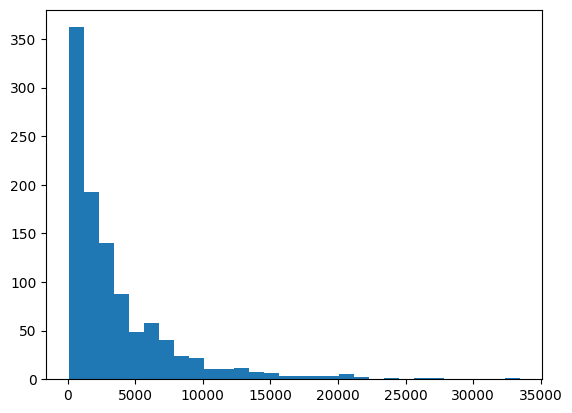

In [23]:
plt.hist(df_bnb_all.query("nue_score > 4")["flash_measPe"], bins = 30)


100%|██████████| 1046/1046 [00:00<00:00, 298228.67it/s]


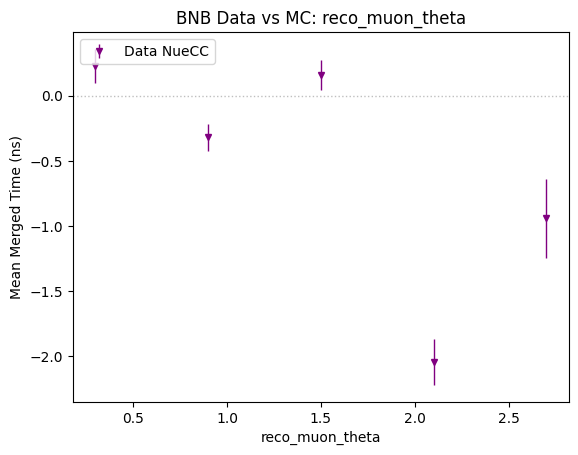

100%|██████████| 1046/1046 [00:00<00:00, 415852.32it/s]


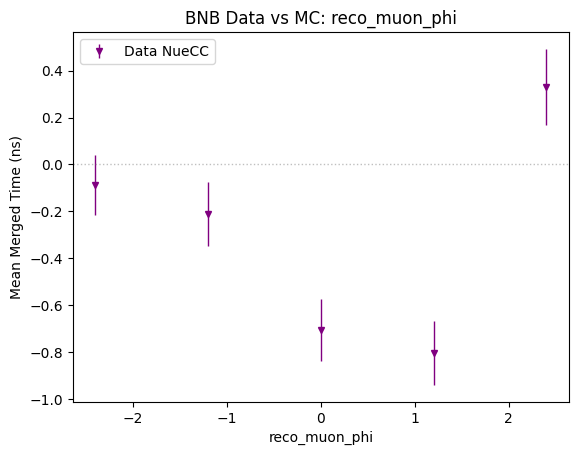

100%|██████████| 1046/1046 [00:00<00:00, 296977.05it/s]


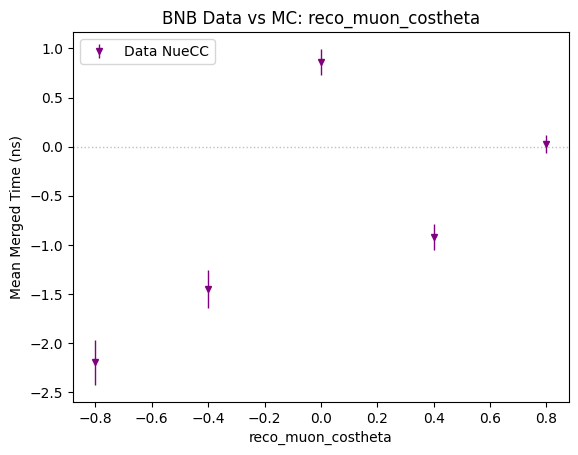

100%|██████████| 1046/1046 [00:00<00:00, 416365.38it/s]


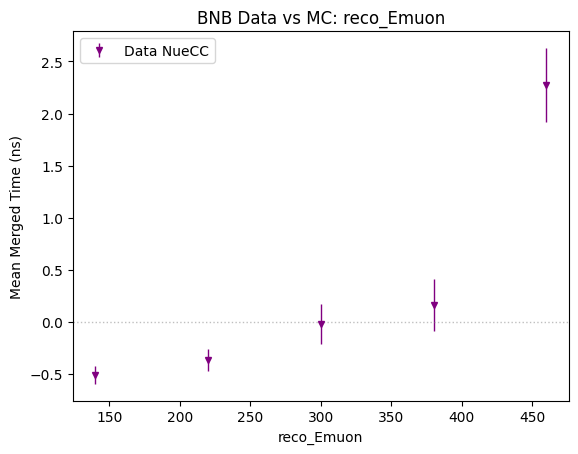

100%|██████████| 1046/1046 [00:00<00:00, 487688.08it/s]


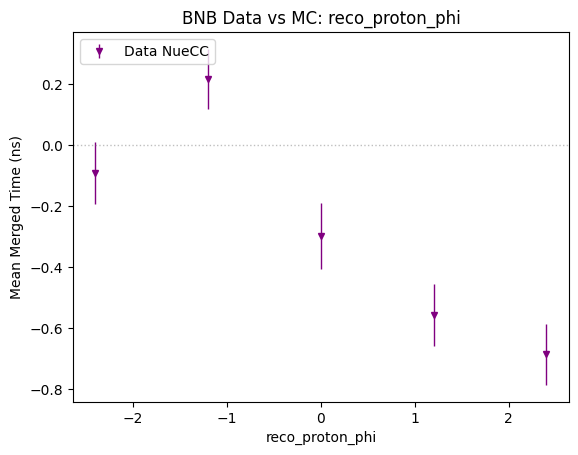

100%|██████████| 1046/1046 [00:00<00:00, 499515.20it/s]
C:\Users\andre\AppData\Local\Temp\ipykernel_12472\1872816581.py:35: RuntimeWarning: invalid value encountered in scalar divide
  means_CCpi0.append(np.sum(x*y)/np.sum(y))
C:\Users\andre\AppData\Local\Temp\ipykernel_12472\1872816581.py:36: RuntimeWarning: invalid value encountered in scalar divide
  mean_errors_CCpi0.append(np.sqrt(np.sum(y)/np.sum(y)**2))


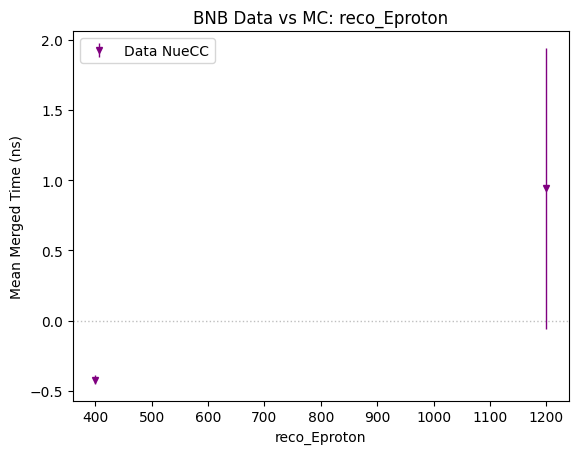

100%|██████████| 1046/1046 [00:00<00:00, 297299.04it/s]


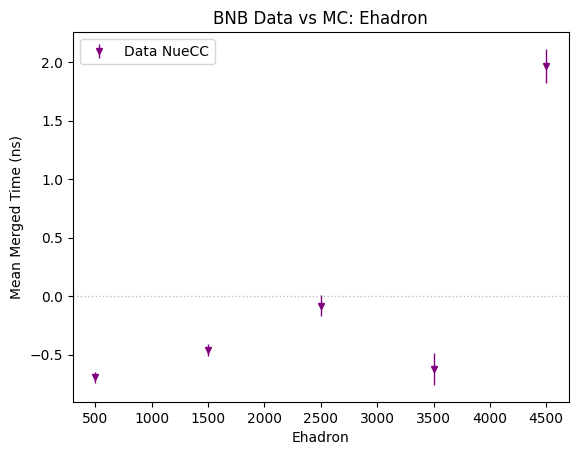

100%|██████████| 1046/1046 [00:00<00:00, 295656.18it/s]


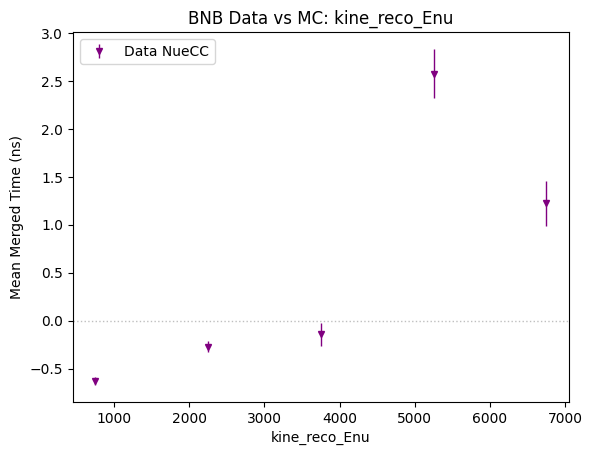

100%|██████████| 1046/1046 [00:00<00:00, 348498.05it/s]


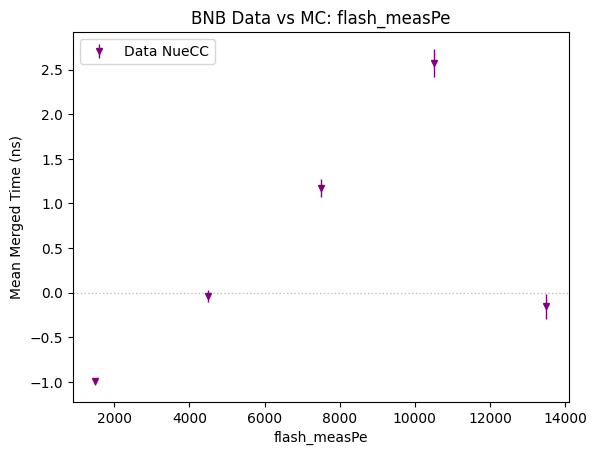

In [24]:
plot_merge_time_spread("reco_muon_theta", np.linspace(0, 3, 6), 30, "nue_score > 4")
plt.show()
plot_merge_time_spread("reco_muon_phi", np.linspace(-3, 3, 6), 30, "nue_score > 4")
plt.show()
plot_merge_time_spread("reco_muon_costheta", np.linspace(-1, 1, 6), 30, "nue_score > 4")
plt.show()
'''plot_merge_time_spread("reco_muon_cosphi", np.linspace(-1, 1, 6), 30, "nue_score > 4")
plt.show()'''
plot_merge_time_spread("reco_Emuon", np.linspace(100, 500, 6), 30, "nue_score > 4")
plt.show()

'''plot_merge_time_spread("reco_proton_theta", np.linspace(0, 2.5, 6), 30, "nue_score > 4")
plt.show()'''
plot_merge_time_spread("reco_proton_phi", np.linspace(-3, 3, 6), 30, "nue_score > 4")
plt.show()
'''plot_merge_time_spread("reco_proton_costheta", np.linspace(-1, 1, 6), 30, "nue_score > 4")
plt.show()'''
'''plot_merge_time_spread("reco_proton_cosphi", np.linspace(-1, 1, 6), 30, "nue_score > 4")
plt.show()'''
plot_merge_time_spread("reco_Eproton", np.linspace(0, 4000, 6), 30, "nue_score > 4")
plt.show()

plot_merge_time_spread("Ehadron", np.linspace(0, 5000, 6), 30, "nue_score > 4")
plt.show()

plot_merge_time_spread("kine_reco_Enu", np.linspace(0, 7500, 6), 30, "nue_score > 4") #0, 7500
plt.show()
plot_merge_time_spread("flash_measPe", np.linspace(0, 15000, 6), 30, "nue_score > 4") #0, 15000
plt.show()


(array([362., 193., 140.,  88.,  49.,  58.,  40.,  24.,  22.,  11.,  11.,
         12.,   7.,   6.,   3.,   3.,   3.,   3.,   5.,   2.,   0.,   1.,
          0.,   1.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([   74.50159454,  1186.60058594,  2298.69970703,  3410.79858398,
         4522.89746094,  5634.99658203,  6747.09521484,  7859.19433594,
         8971.29394531, 10083.39257812, 11195.4921875 , 12307.59082031,
        13419.68945312, 14531.7890625 , 15643.88769531, 16755.98632812,
        17868.0859375 , 18980.18554688, 20092.28320312, 21204.3828125 ,
        22316.48242188, 23428.58007812, 24540.6796875 , 25652.77929688,
        26764.87695312, 27876.9765625 , 28989.07617188, 30101.17578125,
        31213.2734375 , 32325.37304688, 33437.46875   ]),
 <BarContainer object of 30 artists>)

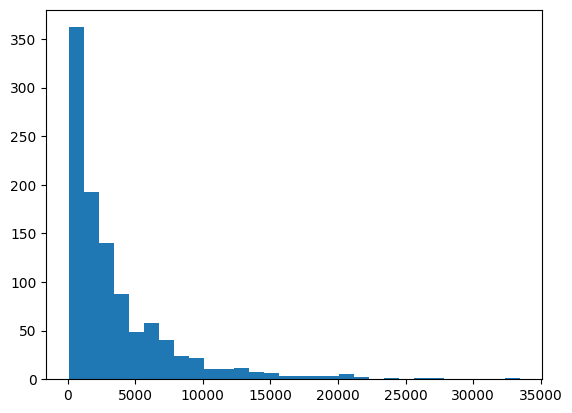

In [25]:
plt.hist(df_bnb_all.query("nue_score > 4")["flash_measPe"], bins = 30)

100%|██████████| 1046/1046 [00:00<00:00, 322496.47it/s]


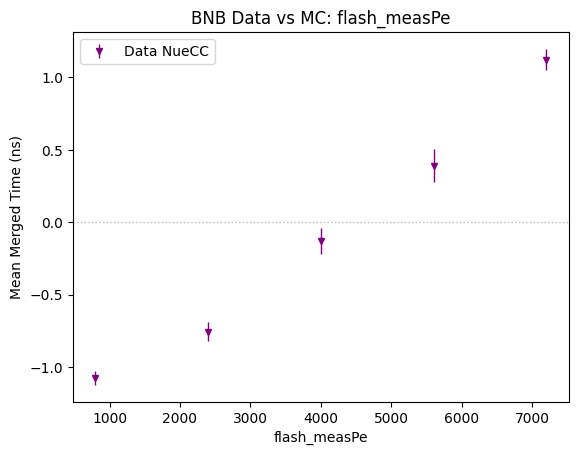

100%|██████████| 137443/137443 [00:00<00:00, 297245.86it/s]


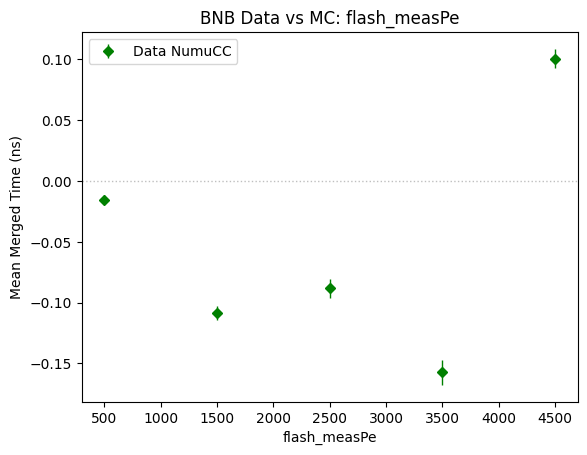

In [26]:
plot_merge_time_spread("flash_measPe", np.linspace(0, 8000, 6), 30, "nue_score > 4") #0, 15000
plt.show()
plot_merge_time_spread("flash_measPe", np.linspace(0, 5000, 6), 30, "numu_score > 0.9") #0, 15000
plt.show()

100%|██████████| 137443/137443 [00:00<00:00, 375866.25it/s]


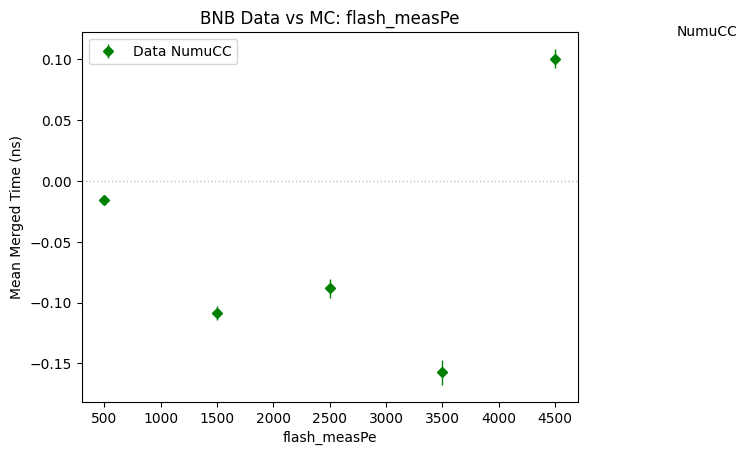

100%|██████████| 8732/8732 [00:00<00:00, 418295.08it/s]


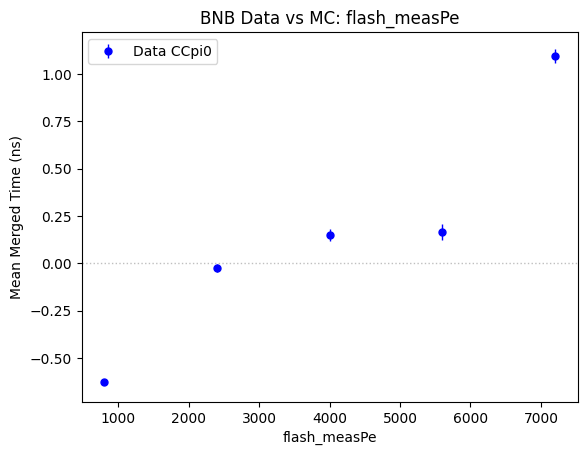

100%|██████████| 6565/6565 [00:00<00:00, 387029.57it/s]


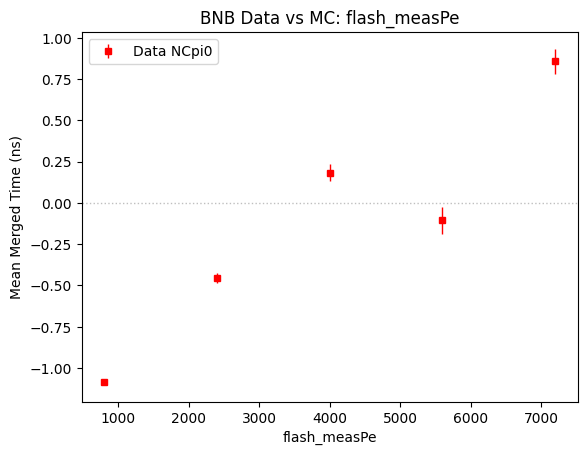

In [27]:
plot_merge_time_spread("flash_measPe", np.linspace(0, 5000, 6), 30, "numu_score > 0.9") #0, 15000
plt.text(1.2, 1, "NumuCC", transform=plt.gca().transAxes, va='center')
plt.show()
plot_merge_time_spread("flash_measPe", np.linspace(0, 8000, 6), 30, CCpi0_query) #0, 15000
plt.show()
plot_merge_time_spread("flash_measPe", np.linspace(0, 8000, 6), 30, NCpi0_bdt_query) #0, 15000
plt.show()

In [28]:
df_bnb_4b_data = pd.read_pickle("df_bnb_new_data_velocity_full_nocor.pkl")


In [29]:
def plot_merge_time_spread_4b(x_var, bins, nbins=18, selection_query=CCpi0_query):
    means_data, mean_errors_data, stds_data, std_errors_data = get_stats(
        df_bnb_4b_data_cor, selection_query, x_var, "merge_time_linear_new", bins, nbins
    )

    label_select = "CCpi0"
    marker_select = "o"
    color_data = "blue"
    color_mc = "cyan"
    if selection_query == NCpi0_query:
        label_select = "NCpi0"
        marker_select = "s"
        color_data = "red"
        color_mc = "orange"
    if selection_query == "numu_score > 0.9":
        label_select = "NumuCC"
        marker_select = "D"
        color_data = "green"
        color_mc = "lime"
    if selection_query == "nue_score > 4":
        label_select = "NueCC"
        marker_select = "v"
        color_data = "purple"
        color_mc = "violet"
    bin_centers = get_bin_centers(bins)
    plt.title(label_select)
    #plt.figure(dpi=150)
    plt.errorbar(bin_centers, means_data, yerr=mean_errors_data, lw=0, ms=5, marker = marker_select, elinewidth=1, label="Data " + label_select, color = color_data)
    plt.xlabel(x_var)
    plt.ylabel("Mean Merged Time (ns)")
    plt.axhline(0, color='gray', linestyle=':', linewidth=1, alpha=0.5) 
    #plt.legend(loc='upper left')

scaling_recalc(df_bnb_4b_data)

100%|██████████| 7477/7477 [00:00<00:00, 893317.70it/s]

7477
7477
7477 7477 7477 7477


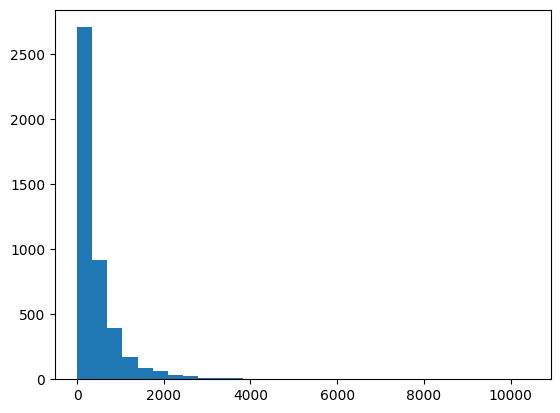

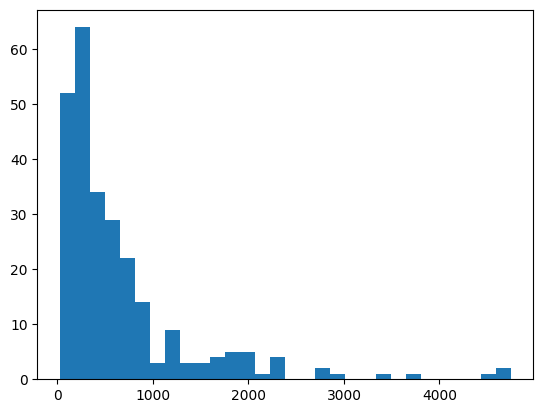

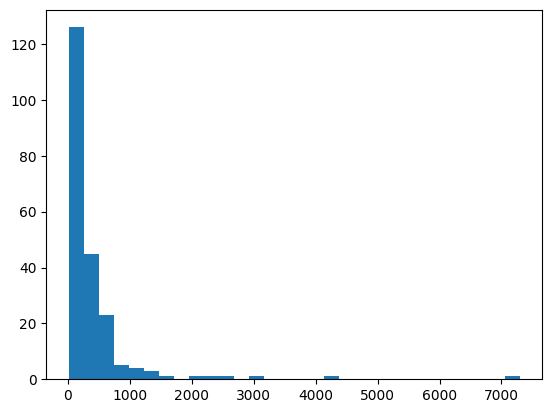

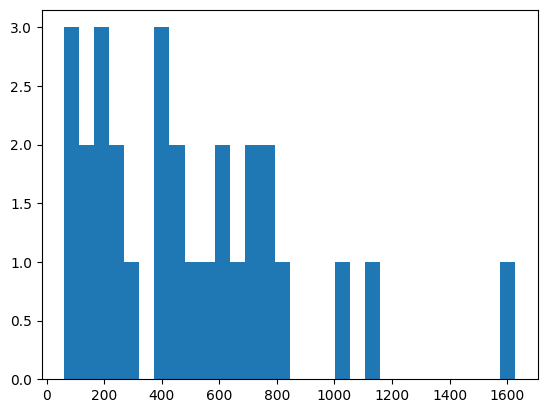

In [30]:
plt.hist(df_bnb_4b_data.query("numu_score > 0.9")["Ph_Tot"], bins = 30)
plt.show()
plt.hist(df_bnb_4b_data.query(CCpi0_query)["Ph_Tot"], bins = 30)
plt.show()
plt.hist(df_bnb_4b_data.query(NCpi0_query)["Ph_Tot"], bins = 30)
plt.show()
plt.hist(df_bnb_4b_data.query("nue_score > 4")["Ph_Tot"], bins = 30)
plt.show()

In [31]:
'''plot_merge_time_spread_4b("Ph_Tot", np.linspace(0, 2000, 6), 30, "merge_time_linear_nocor>-9.42 and merge_time_linear_nocor<9.42") 
plt.show()'''
plot_merge_time_spread_4b("Ph_Tot", np.linspace(0, 2000, 6), 30, "numu_score > 0.9") 
plt.show()
plot_merge_time_spread_4b("Ph_Tot", np.linspace(0, 2000, 6), 30, CCpi0_query) 
plt.show()
plot_merge_time_spread_4b("Ph_Tot", np.linspace(0, 750, 6), 30, NCpi0_query) 
plt.show()
plot_merge_time_spread_4b("Ph_Tot", np.linspace(0, 1600, 6), 30, "nue_score > 4") 
plt.show()

NameError: name 'df_bnb_4b_data_cor' is not defined

numuCC: Gaussian      mean: 0.6956   std: 3.0502   C: 0.0129
CCpi0: Gaussian      mean: 0.0206   std: 3.4064   C: 0.008
NCpi0: Gaussian      mean: -0.1332   std: 4.2532   C: 0.022
loose nueCC: Gaussian      mean: 0.9932   std: -0.2641   C: 0.0586


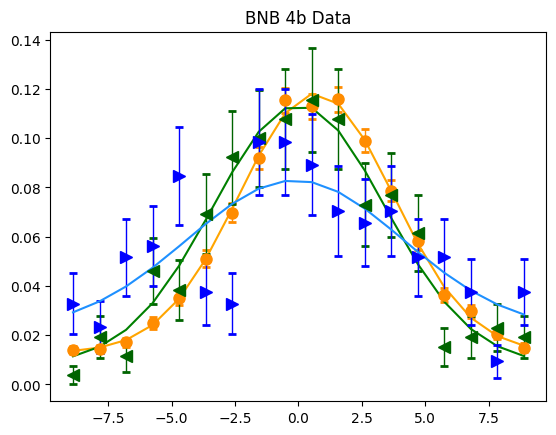

In [32]:
df_bnb_4b_data["pio_mass"] = df_bnb_4b_data['kine_pio_mass'].to_numpy()* em_charge_scale
df_bnb_4b_data["em_charge_scale"] = np.ones_like(df_bnb_4b_data['kine_pio_mass'].to_numpy())* em_charge_scale

nbins = 18

data_numuCC = df_bnb_4b_data.query("merge_time_linear_nocor>-9.42 and merge_time_linear_nocor<9.42").query("numu_score>0.9")["merge_time_linear_nocor"].to_numpy()
norm1 = len(data_numuCC)
y,xbins = np.histogram(data_numuCC,bins=nbins,range=(-9.42, 9.42))
x = get_bin_centers(xbins)
x1 = x
popt,pcov = curve_fit(gaus,x,y/norm1)
print("numuCC: Gaussian      mean:",round(popt[1],4),"  std:",round(popt[2],4),"  C:",round(popt[3],4))

nbins = 18

data_CCpi0 = df_bnb_4b_data.query("merge_time_linear_nocor>-9.42 and merge_time_linear_nocor<9.42").query(CCpi0_query)["merge_time_linear_nocor"].to_numpy()
norm2 = len(data_CCpi0)
y2,xbins = np.histogram(data_CCpi0,bins=nbins,range=(-9.42, 9.42))
x = get_bin_centers(xbins)
x2 = x
popt2,pcov2 = curve_fit(gaus,x,y2/norm2)
print("CCpi0: Gaussian      mean:",round(popt2[1],4),"  std:",round(popt2[2],4),"  C:",round(popt2[3],4))

nbins = 18

data_NCpi0 = df_bnb_4b_data.query("merge_time_linear_nocor>-9.42 and merge_time_linear_nocor<9.42").query(NCpi0_query)["merge_time_linear_nocor"].to_numpy()
norm3 = len(data_NCpi0)
y3,xbins = np.histogram(data_NCpi0,bins=nbins,range=(-9.42, 9.42))
x = get_bin_centers(xbins)
x3 = x
popt3,pcov3 = curve_fit(gaus,x,y3/norm3)
print("NCpi0: Gaussian      mean:",round(popt3[1],4),"  std:",round(popt3[2],4),"  C:",round(popt3[3],4))


data_nueCC = df_bnb_4b_data.query("merge_time_linear_nocor>-9.42 and merge_time_linear_nocor<9.42").query("nue_score>2")["merge_time_linear_nocor"].to_numpy()
norm4 = len(data_nueCC)
y4,xbins = np.histogram(data_nueCC,bins=nbins,range=(-9.42, 9.42))
x = get_bin_centers(xbins)
x4 = x
popt4,pcov4 = curve_fit(gaus,x,y4/norm4)
print("loose nueCC: Gaussian      mean:",round(popt4[1],4),"  std:",round(popt4[2],4),"  C:",round(popt4[3],4))


plt.figure()
plt.title("BNB 4b Data")
plt.errorbar(x1,y/norm1,yerr=np.sqrt(y)/norm1,ms=8, lw=1,fmt='o',ecolor = 'darkorange',color='darkorange', capsize=3, capthick=2)
plt.plot(x1,gaus(x1,*popt),color='orange',label='numuCC:'+'\n'+f"$\mu$={round(popt[1],2)}, $\\sigma$={round(abs(popt[2]),2)}")

plt.errorbar(x2,y2/norm2,yerr=np.sqrt(y2)/norm2,ms=8, lw=1,fmt='<',ecolor = 'darkgreen',color='darkgreen', capsize=3, capthick=2)
plt.plot(x2,gaus(x2,*popt2),color='green',label='CCpi0:'+'\n'+f"$\mu$={round(popt2[1],2)}, $\\sigma$={round(abs(popt2[2]),2)}")

plt.errorbar(x3,y3/norm3,yerr=np.sqrt(y3)/norm3,ms=8, lw=1,fmt='>',ecolor = 'blue',color='blue', capsize=3, capthick=2)
plt.plot(x3,gaus(x3,*popt3),color='dodgerblue',label='NCpi0:'+'\n'+f"$\mu$={round(popt3[1],2)}, $\\sigma$={round(abs(popt3[2]),2)}")

In [33]:
df_bnb_4b_data_cor = pd.read_pickle("df_bnb_new_data_velocity_full.pkl")

In [34]:
df_bnb_4b_data_cor["pio_mass"] = df_bnb_4b_data_cor['kine_pio_mass'].to_numpy()* em_charge_scale
df_bnb_4b_data_cor["em_charge_scale"] = np.ones_like(df_bnb_4b_data_cor['kine_pio_mass'].to_numpy())* em_charge_scale


In [35]:
mask_CCpi0 = (
    (df_bnb_4b_data_cor["merge_time_linear"] > -9.42) & (df_bnb_4b_data_cor["merge_time_linear"] < 9.42) & (df_bnb_4b_data_cor.eval(CCpi0_query))
)
mask_NCpi0 = (
    (df_bnb_4b_data_cor["merge_time_linear"] > -9.42) & (df_bnb_4b_data_cor["merge_time_linear"] < 9.42) & (df_bnb_4b_data_cor.eval(NCpi0_query))
)
#df_bnb_4b_data_cor["merge_time_linear_new"] = df_bnb_4b_data_cor["merge_time_linear"] - 0.002* df_bnb_4b_data_cor["Ph_Tot"]

shift_ccpi0 = (df_bnb_4b_data_cor.loc[mask_CCpi0, "merge_time_linear"].mean()-df_bnb_4b_data_cor.loc[mask_CCpi0, "merge_time_linear_new"].mean())
shift_ncpi0 = (df_bnb_4b_data_cor.loc[mask_NCpi0, "merge_time_linear"].mean()-df_bnb_4b_data_cor.loc[mask_NCpi0, "merge_time_linear_new"].mean())

print("Shift CCpi0:", shift_ccpi0
      , "Shift NCpi0:", shift_ncpi0)
#df_bnb_4b_data_cor["merge_time_new"] = df_bnb_4b_data_cor["merge_time"] - 0.0002* df_bnb_4b_data_cor["flash_measPe"]
df_bnb_4b_data_cor["merge_time_linear_new"] = df_bnb_4b_data_cor["merge_time_linear"]
df_bnb_4b_data_cor.loc[mask_CCpi0, "merge_time_linear_new"] = df_bnb_4b_data_cor.loc[mask_CCpi0, "merge_time_linear_new"] - 0.0002 * df_bnb_4b_data_cor.loc[mask_CCpi0, "flash_measPe"] + shift_ccpi0
df_bnb_4b_data_cor.loc[mask_NCpi0, "merge_time_linear_new"] = df_bnb_4b_data_cor.loc[mask_NCpi0, "merge_time_linear_new"] - 0.0003 * df_bnb_4b_data_cor.loc[mask_NCpi0, "flash_measPe"] + shift_ncpi0



KeyError: 'merge_time_linear_new'

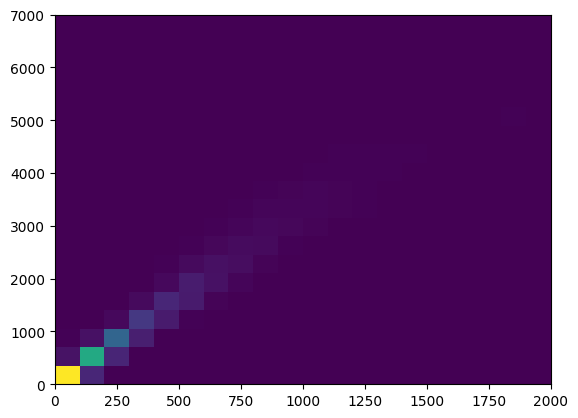

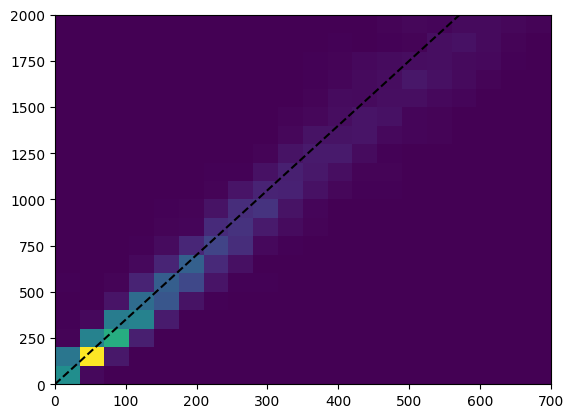

'plot_merge_time_spread_4b("Ph_Tot", np.linspace(0, 2000, 6), 30, CCpi0_query) \nplt.show()\nplot_merge_time_spread_4b("Ph_Tot", np.linspace(0, 750, 6), 30, NCpi0_query) \nplt.show()\nplot_merge_time_spread_4b("Ph_Tot", np.linspace(0, 1600, 6), 30, "nue_score > 4") \nplt.show()'

In [36]:
plt.hist2d(df_bnb_4b_data["Ph_Tot"], df_bnb_4b_data["flash_measPe"],bins=(20,20),range=((0,2000),(0,7000)))
plt.show()
x = np.linspace(0,700,1000)
y = []
for i in range(len(x)): y.append(x[i]*3.5)
plt.hist2d(df_bnb_4b_data["Ph_Tot"], df_bnb_4b_data["flash_measPe"],bins=(20,20),range=((0,700),(0,2000)))
plt.plot(x,y,ls='--',color='black')
plt.show()

#plot_merge_time_spread_4b("Ph_Tot", np.linspace(0, 2000, 6), 30, "numu_score > 0.9") 
'''plot_merge_time_spread_4b("Ph_Tot", np.linspace(0, 2000, 6), 30, CCpi0_query) 
plt.show()
plot_merge_time_spread_4b("Ph_Tot", np.linspace(0, 750, 6), 30, NCpi0_query) 
plt.show()
plot_merge_time_spread_4b("Ph_Tot", np.linspace(0, 1600, 6), 30, "nue_score > 4") 
plt.show()'''

In [37]:
def triple_plotter(df, label="", time_col="merge_time_linear_sps"):
    nbins = 18

    # Helper for query string
    time_query = f"{time_col}>-9.42 and {time_col}<9.42"

    data_numuCC = df.query(time_query).query("numu_score>0.9")[time_col].to_numpy()
    norm1 = len(data_numuCC)
    y, xbins = np.histogram(data_numuCC, bins=nbins, range=(-9.42, 9.42))
    x1 = get_bin_centers(xbins)
    popt, pcov = curve_fit(gaus, x1, y / norm1)
    print("numuCC: Gaussian      mean:", round(popt[1], 4), "  std:", round(popt[2], 4), "  C:", round(popt[3], 4))

    data_CCpi0 = df.query(time_query).query(CCpi0_query)[time_col].to_numpy()
    norm2 = len(data_CCpi0)
    y2, xbins = np.histogram(data_CCpi0, bins=nbins, range=(-9.42, 9.42))
    x2 = get_bin_centers(xbins)
    popt2, pcov2 = curve_fit(gaus, x2, y2 / norm2)
    print("CCpi0: Gaussian      mean:", round(popt2[1], 4), "  std:", round(popt2[2], 4), "  C:", round(popt2[3], 4))

    data_NCpi0 = df.query(time_query).query(NCpi0_query)[time_col].to_numpy()
    norm3 = len(data_NCpi0)
    y3, xbins = np.histogram(data_NCpi0, bins=nbins, range=(-9.42, 9.42))
    x3 = get_bin_centers(xbins)
    popt3, pcov3 = curve_fit(gaus, x3, y3 / norm3)
    print("NCpi0: Gaussian      mean:", round(popt3[1], 4), "  std:", round(popt3[2], 4), "  C:", round(popt3[3], 4))

    data_nueCC = df.query(time_query).query("nue_score>2")[time_col].to_numpy()
    norm4 = len(data_nueCC)
    y4, xbins = np.histogram(data_nueCC, bins=nbins, range=(-9.42, 9.42))
    x4 = get_bin_centers(xbins)
    popt4, pcov4 = curve_fit(gaus, x4, y4 / norm4)
    print("loose nueCC: Gaussian      mean:", round(popt4[1], 4), "  std:", round(popt4[2], 4), "  C:", round(popt4[3], 4))

    if(label == "df_bnb_new_data"):
        label = "BNB Data: "
    elif(label == "df_bnb_new_mc"):
        label = "BNB MC: "

    if(time_col == "merge_time_linear_sps"):
        label = label + " (spacepoints)"
    else:
        label = label + " (Reco linear)"

    plt.figure()
    plt.title(label)
    plt.errorbar(x1, y / norm1, yerr=np.sqrt(y) / norm1, ms=8, lw=1, fmt='o', ecolor='darkorange', color='darkorange', capsize=3, capthick=2)
    plt.plot(x1, gaus(x1, *popt), color='orange', label='numuCC:' + '\n' + f"$\mu$={round(popt[1],2)}, $\\sigma$={round(abs(popt[2]),2)}")

    plt.errorbar(x2, y2 / norm2, yerr=np.sqrt(y2) / norm2, ms=8, lw=1, fmt='<', ecolor='darkgreen', color='darkgreen', capsize=3, capthick=2)
    plt.plot(x2, gaus(x2, *popt2), color='green', label='CCpi0:' + '\n' + f"$\mu$={round(popt2[1],2)}, $\\sigma$={round(abs(popt2[2]),2)}")

    plt.errorbar(x3, y3 / norm3, yerr=np.sqrt(y3) / norm3, ms=8, lw=1, fmt='>', ecolor='blue', color='blue', capsize=3, capthick=2)
    plt.plot(x3, gaus(x3, *popt3), color='dodgerblue', label='NCpi0:' + '\n' + f"$\mu$={round(popt3[1],2)}, $\\sigma$={round(abs(popt3[2]),2)}")

    
    '''plt.errorbar(x4,y4/norm4,yerr=np.sqrt(y4)/norm4,ms=8, lw=1,fmt='>',ecolor = 'magenta',color='magenta', capsize=3, capthick=2)
    plt.plot(x4,gaus(x4,*popt4),color='magenta',label='loose nueCC:'+'\n'+f"$\mu$={round(popt4[1],2)}, $\\sigma$={round(abs(popt4[2]),2)}")
    '''
    plt.legend()
    plt.show()

triple_plotter(df_bnb_4b_data_cor, label="df_bnb_new_data", time_col="merge_time_linear_new")

UndefinedVariableError: name 'merge_time_linear_new' is not defined

In [ ]:
'''#flash_measePe -> merge_time_new
mask_numu = (
    (df_bnb_all["merge_time"] > -9.42) & (df_bnb_all["merge_time"] < 9.42) & (df_bnb_all.eval("numu_score>0.9"))
)
mask_CCpi0 = (
    (df_bnb_all["merge_time"] > -9.42) & (df_bnb_all["merge_time"] < 9.42) & (df_bnb_all.eval(CCpi0_query))
)
mask_NCpi0 = (
    (df_bnb_all["merge_time"] > -9.42) & (df_bnb_all["merge_time"] < 9.42) & (df_bnb_all.eval(NCpi0_bdt_query))
)
mask_nue = (
    (df_bnb_all["merge_time"] > -9.42) & (df_bnb_all["merge_time"] < 9.42) & (df_bnb_all.eval("nue_score > 4"))
)

#df_bnb_all["merge_time_new"] = df_bnb_all["merge_time"] - 0.0002* df_bnb_all["flash_measPe"]
df_bnb_all["merge_time_new"] = df_bnb_all["merge_time"]
df_bnb_all.loc[mask_CCpi0, "merge_time_new"] -=  0.0002 * df_bnb_all.loc[mask_CCpi0, "flash_measPe"]
df_bnb_all.loc[mask_NCpi0, "merge_time_new"] -=  0.0003 * df_bnb_all.loc[mask_NCpi0, "flash_measPe"] 
df_bnb_all.loc[mask_nue, "merge_time_new"] -=  0.0003 * df_bnb_all.loc[mask_nue, "flash_measPe"] 

shift_ccpi0 = (df_bnb_all.loc[mask_CCpi0, "merge_time"].mean()-df_bnb_all.loc[mask_CCpi0, "merge_time_new"].mean())
shift_ncpi0 = (df_bnb_all.loc[mask_NCpi0, "merge_time"].mean()-df_bnb_all.loc[mask_NCpi0, "merge_time_new"].mean())
shift_nue = (df_bnb_all.loc[mask_nue, "merge_time"].mean()-df_bnb_all.loc[mask_nue, "merge_time_new"].mean())


shift_ccpi0 = 0.5
shift_ncpi0 = 0.5
shift_nue = 0.5


print("Shift CCpi0:", shift_ccpi0
      , "Shift NCpi0:", shift_ncpi0, "Shift Nue:", shift_nue)

df_bnb_all.loc[mask_CCpi0, "merge_time_new"] += shift_ccpi0
df_bnb_all.loc[mask_NCpi0, "merge_time_new"] += shift_ncpi0
df_bnb_all.loc[mask_nue, "merge_time_new"] += shift_nue'''

Shift CCpi0: 0.5 Shift NCpi0: 0.5 Shift Nue: 0.5


In [46]:
#flash_measPe -> evtTimeNS_Shifted -> merge_time_new
mask_numu = (
    (df_bnb_all["merge_time"] > -9.42) & (df_bnb_all["merge_time"] < 9.42) & (df_bnb_all.eval("numu_score>0.9"))
)
mask_CCpi0 = (
    (df_bnb_all["merge_time"] > -9.42) & (df_bnb_all["merge_time"] < 9.42) & (df_bnb_all.eval(CCpi0_query))
)
mask_NCpi0 = (
    (df_bnb_all["merge_time"] > -9.42) & (df_bnb_all["merge_time"] < 9.42) & (df_bnb_all.eval(NCpi0_bdt_query))
)
mask_nue = (
    (df_bnb_all["merge_time"] > -9.42) & (df_bnb_all["merge_time"] < 9.42) & (df_bnb_all.eval("nue_score > 4"))
)


df_bnb_all["evtTimeNS_shifted"] = df_bnb_all["evtTimeNS"]
df_bnb_all["merge_time_new"] = df_bnb_all["merge_time"]


#df_bnb_all.loc[mask_numu, "evtTimeNS_shifted"] -= 0.0004 * df_bnb_all.loc[mask_numu, "flash_measPe"]
df_bnb_all.loc[mask_CCpi0, "evtTimeNS_shifted"] += 0.002 * df_bnb_all.loc[mask_CCpi0, "reco_nuvtxX"]
df_bnb_all.loc[mask_NCpi0, "evtTimeNS_shifted"] += 0.008 * df_bnb_all.loc[mask_NCpi0, "reco_nuvtxX"]
df_bnb_all.loc[mask_nue, "evtTimeNS_shifted"] += 0.005 * df_bnb_all.loc[mask_nue, "reco_nuvtxX"]

bnb_gap = 18.936

def merge_time_shifted(df, time_col="evtTimeNS_shifted", out_col="merge_time_new"):
    run = df["run"].to_numpy()
    evtTimeNS = df[time_col].to_numpy()
    gap = bnb_gap
    new_times = []
    for i in range(len(evtTimeNS)):
        Shift = 0
        if (run[i] >= 17380): Shift = 2916.0 
        elif (run[i] >= 13697): Shift = 3147.3
        elif (run[i] >= 10812): Shift = 3568.5 
        elif (run[i] >= 8321): Shift = 3610.7
        elif (run[i] >= 5800): Shift = 3164.4
        elif (run[i] > 0 ): Shift = 3168.9
        TThelp = evtTimeNS[i] - Shift + gap * 0.5
        if np.nan_to_num(evtTimeNS[i], nan=-999999, posinf=-999999, neginf=-999999) <= 0:
            new_times.append(-9999)
            continue
        TT_merged = (TThelp - (int((TThelp) / gap)) * gap) - gap * 0.5
        new_times.append(TT_merged)
    df[out_col] = new_times

merge_time_shifted(df_bnb_all)

'''shift_ccpi0 = 1
shift_ncpi0 = 1
shift_nue = 2

df_bnb_all.loc[mask_CCpi0, "merge_time_new"] += shift_ccpi0
df_bnb_all.loc[mask_NCpi0, "merge_time_new"] += shift_ncpi0
df_bnb_all.loc[mask_nue, "merge_time_new"] += shift_nue

print("Shift CCpi0:", shift_ccpi0
      , "Shift NCpi0:", shift_ncpi0, "Shift Nue:", shift_nue)'''


'shift_ccpi0 = 1\nshift_ncpi0 = 1\nshift_nue = 2\n\ndf_bnb_all.loc[mask_CCpi0, "merge_time_new"] += shift_ccpi0\ndf_bnb_all.loc[mask_NCpi0, "merge_time_new"] += shift_ncpi0\ndf_bnb_all.loc[mask_nue, "merge_time_new"] += shift_nue\n\nprint("Shift CCpi0:", shift_ccpi0\n      , "Shift NCpi0:", shift_ncpi0, "Shift Nue:", shift_nue)'

numuCC: Gaussian      mean: -0.0774   std: 2.8244   C: 0.0086
CCpi0: Gaussian      mean: -0.006   std: 2.7633   C: 0.008
NCpi0: Gaussian      mean: -0.0786   std: 3.284   C: 0.0112
loose nueCC: Gaussian      mean: -0.1232   std: 3.0723   C: 0.0148


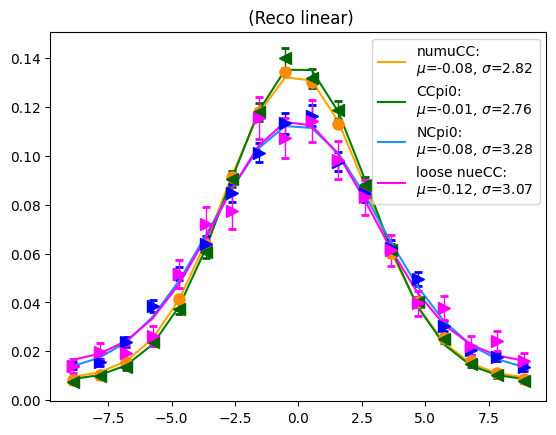

In [47]:
time_col = "merge_time_new"
df = df_bnb_all
label = ""

nbins = 18

# Helper for query string
time_query = f"{time_col}>-9.42 and {time_col}<9.42"

data_numuCC = df.query(time_query).query("numu_score>0.9")[time_col].to_numpy()
norm1 = len(data_numuCC)
y, xbins = np.histogram(data_numuCC, bins=nbins, range=(-9.42, 9.42))
x1 = get_bin_centers(xbins)
popt, pcov = curve_fit(gaus, x1, y / norm1)
print("numuCC: Gaussian      mean:", round(popt[1], 4), "  std:", round(popt[2], 4), "  C:", round(popt[3], 4))

data_CCpi0 = df.query(time_query).query(CCpi0_query)[time_col].to_numpy()
norm2 = len(data_CCpi0)
y2, xbins = np.histogram(data_CCpi0, bins=nbins, range=(-9.42, 9.42))
x2 = get_bin_centers(xbins)
popt2, pcov2 = curve_fit(gaus, x2, y2 / norm2)
print("CCpi0: Gaussian      mean:", round(popt2[1], 4), "  std:", round(popt2[2], 4), "  C:", round(popt2[3], 4))

data_NCpi0 = df.query(time_query).query(NCpi0_bdt_query)[time_col].to_numpy()
norm3 = len(data_NCpi0)
y3, xbins = np.histogram(data_NCpi0, bins=nbins, range=(-9.42, 9.42))
x3 = get_bin_centers(xbins)
popt3, pcov3 = curve_fit(gaus, x3, y3 / norm3)
print("NCpi0: Gaussian      mean:", round(popt3[1], 4), "  std:", round(popt3[2], 4), "  C:", round(popt3[3], 4))

data_nueCC = df.query(time_query).query("nue_score>2")[time_col].to_numpy()
norm4 = len(data_nueCC)
y4, xbins = np.histogram(data_nueCC, bins=nbins, range=(-9.42, 9.42))
x4 = get_bin_centers(xbins)
popt4, pcov4 = curve_fit(gaus, x4, y4 / norm4)
print("loose nueCC: Gaussian      mean:", round(popt4[1], 4), "  std:", round(popt4[2], 4), "  C:", round(popt4[3], 4))

if(label == "df_bnb_new_data"):
    label = "BNB Data: "
elif(label == "df_bnb_new_mc"):
    label = "BNB MC: "

if(time_col == "merge_time_linear_sps"):
    label = label + " (spacepoints)"
else:
    label = label + " (Reco linear)"

plt.figure()
plt.title(label)
plt.errorbar(x1, y / norm1, yerr=np.sqrt(y) / norm1, ms=8, lw=1, fmt='o', ecolor='darkorange', color='darkorange', capsize=3, capthick=2)
plt.plot(x1, gaus(x1, *popt), color='orange', label='numuCC:' + '\n' + f"$\mu$={round(popt[1],2)}, $\\sigma$={round(abs(popt[2]),2)}")

plt.errorbar(x2, y2 / norm2, yerr=np.sqrt(y2) / norm2, ms=8, lw=1, fmt='<', ecolor='darkgreen', color='darkgreen', capsize=3, capthick=2)
plt.plot(x2, gaus(x2, *popt2), color='green', label='CCpi0:' + '\n' + f"$\mu$={round(popt2[1],2)}, $\\sigma$={round(abs(popt2[2]),2)}")

plt.errorbar(x3, y3 / norm3, yerr=np.sqrt(y3) / norm3, ms=8, lw=1, fmt='>', ecolor='blue', color='blue', capsize=3, capthick=2)
plt.plot(x3, gaus(x3, *popt3), color='dodgerblue', label='NCpi0:' + '\n' + f"$\mu$={round(popt3[1],2)}, $\\sigma$={round(abs(popt3[2]),2)}")


plt.errorbar(x4,y4/norm4,yerr=np.sqrt(y4)/norm4,ms=8, lw=1,fmt='>',ecolor = 'magenta',color='magenta', capsize=3, capthick=2)
plt.plot(x4,gaus(x4,*popt4),color='magenta',label='loose nueCC:'+'\n'+f"$\mu$={round(popt4[1],2)}, $\\sigma$={round(abs(popt4[2]),2)}")

'''shift_text = f"Shifts:\nCCpi0 = {shift_ccpi0}\nNCpi0 = {shift_ncpi0}\nNue = {shift_nue}"
plt.gcf().text(1.1, 0.2, shift_text, fontsize=12, va='center', ha='right', bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray'))
'''

plt.legend()
plt.show()



In [41]:
def plot_merge_time_spread( x_var, bins, nbins=18, selection_query=CCpi0_query):
    means_data, mean_errors_data, stds_data, std_errors_data = get_stats(
        df_bnb_all, selection_query, x_var, "merge_time_new", bins, nbins
    )

    label_select = "CCpi0"
    marker_select = "o"
    color_data = "blue"
    color_mc = "cyan"
    if selection_query == NCpi0_bdt_query:
        label_select = "NCpi0"
        marker_select = "s"
        color_data = "red"
        color_mc = "orange"
    if selection_query == "numu_score > 0.9":
        label_select = "NumuCC"
        marker_select = "D"
        color_data = "green"
        color_mc = "lime"
    if selection_query == "nue_score > 4":
        label_select = "NueCC"
        marker_select = "v"
        color_data = "purple"
        color_mc = "violet"
    bin_centers = get_bin_centers(bins)
    #plt.figure(dpi=150)
    plt.title("BNB Data vs MC: " + x_var)
    plt.errorbar(bin_centers, means_data, yerr=mean_errors_data, lw=0, ms=5, marker = marker_select, elinewidth=1, label="Data " + label_select, color = color_data)
    plt.xlabel(x_var)
    plt.ylabel("Mean Merged Time (ns)")
    plt.axhline(0, color='gray', linestyle=':', linewidth=1, alpha=0.5) 
    plt.legend(loc='upper left')
    #plt.show()

100%|██████████| 137443/137443 [00:00<00:00, 300930.61it/s]


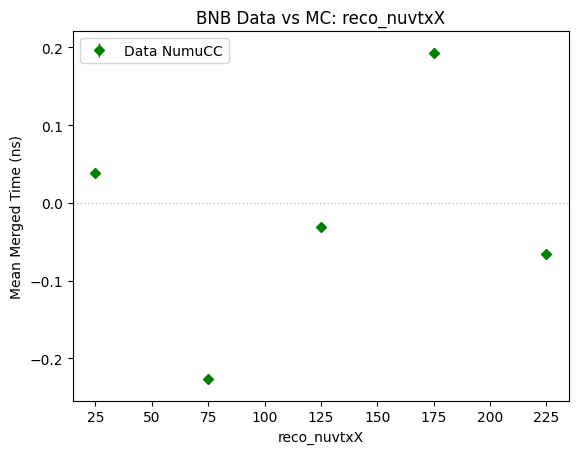

100%|██████████| 8732/8732 [00:00<00:00, 329752.87it/s]


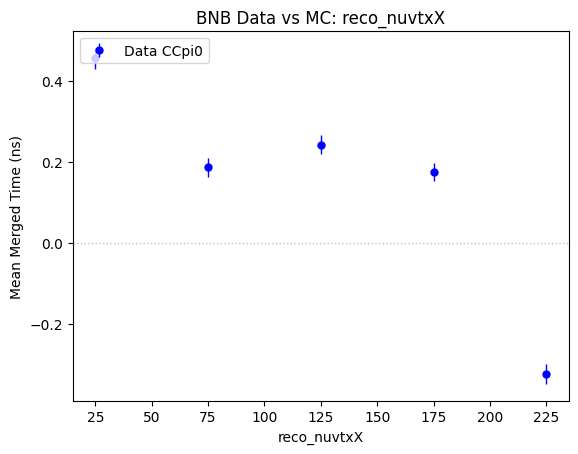

100%|██████████| 6565/6565 [00:00<00:00, 397264.67it/s]


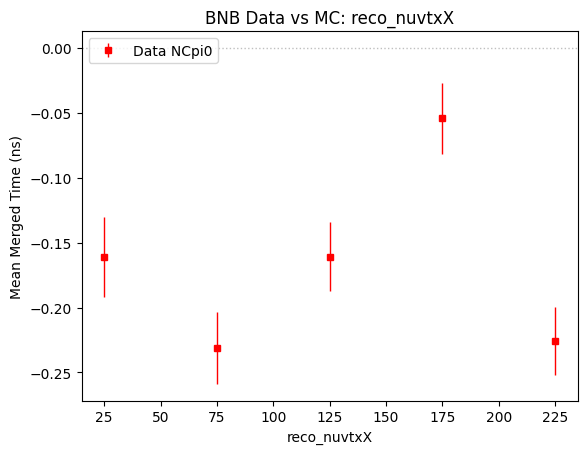

100%|██████████| 1046/1046 [00:00<00:00, 259830.74it/s]


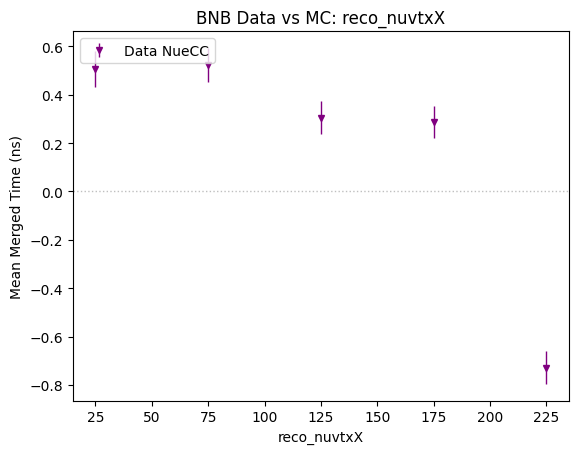

'plot_merge_time_spread("reco_showerKE", np.linspace(0, 1.5, 6), 30, "nue_score > 4")\nplt.show()'

In [42]:
'''plot_merge_time_spread("reco_showerMomentum_0", np.linspace(-1, 1, 6), 30, "nue_score > 4")
plt.show()
plot_merge_time_spread("reco_showerMomentum_1", np.linspace(-1, 1, 6), 30, "nue_score > 4")
plt.show()
plot_merge_time_spread("reco_showerMomentum_2", np.linspace(-1, 1, 6), 30, "nue_score > 4")
plt.show()'''
plot_merge_time_spread("reco_nuvtxX", np.linspace(0, 250, 6), 30, "numu_score > 0.9")
plt.show()
plot_merge_time_spread("reco_nuvtxX", np.linspace(0, 250, 6), 30, CCpi0_query)
plt.show()
plot_merge_time_spread("reco_nuvtxX", np.linspace(0, 250, 6), 30, NCpi0_bdt_query)
plt.show()
plot_merge_time_spread("reco_nuvtxX", np.linspace(0, 250, 6), 30, "nue_score > 4")
plt.show()
'''plot_merge_time_spread("reco_showerKE", np.linspace(0, 1.5, 6), 30, "nue_score > 4")
plt.show()'''

In [83]:
selection_query_flatten = "reco_showervtxX > 0"

print("Numu: ")
print(df_bnb_all.query("numu_score>0.9")["reco_nuvtxX"].shape)
print(df_bnb_all.query(selection_query_flatten).query("numu_score>0.9")["reco_nuvtxX"].shape)

print("CCpi0: ")
print(df_bnb_all.query(CCpi0_query)["reco_nuvtxX"].shape)
print(df_bnb_all.query(selection_query_flatten).query(CCpi0_query)["reco_nuvtxX"].shape)

print("Nue: ")
print(df_bnb_all.query("nue_score>4")["reco_nuvtxX"].shape)
print(df_bnb_all.query(selection_query_flatten).query("nue_score>4")["reco_nuvtxX"].shape)

print("NCpi0: ")
print(df_bnb_all.query(NCpi0_bdt_query)["reco_nuvtxX"].shape)
print(df_bnb_all.query(selection_query_flatten).query(NCpi0_bdt_query)["reco_nuvtxX"].shape)

'''
eproton>35:
numu half half
nue half half
ccpi0 half half
ncpi0 mostly <35

'''

#ccpi0 = +0.002
#nue = +0.005
# #ncpi0 = +0.008


Numu: 
(137443,)
(38741,)
CCpi0: 
(8732,)
(7986,)
Nue: 
(1046,)
(1046,)
NCpi0: 
(6565,)
(6105,)


'\neproton>35:\nnumu half half\nnue half half\nccpi0 half half\nncpi0 mostly <35\n\n'

In [ ]:
plt.hist(df_bnb_all.query(CCpi0_query)["reco_showerKE "], bins=20)
plt.hist(df_bnb_all.query("nue_score>4")["reco_showerKE "], bins=20)
plt.hist(df_bnb_all.query(NCpi0_bdt_query)["reco_showerKE "], bins=20)


KeyError: 'reco_showerKE '